 # Exploración y detección de nulos, vacíos y duplicados

1. Carga el dataset sintético generado dentro del notebook y observa su estructura
con `.head()` y `.info()`

In [1]:
import pandas as pd
df = pd.read_csv('futbolPro.csv')

In [2]:
df.head()

,PlayerID,Name,Age,Team,Nacionalidad,Position,PreferredFoot,Matches,Minutes,Goals,...,stat_62,stat_63,stat_64,stat_65,stat_66,stat_67,stat_68,stat_69,stat_70,stat_71
0,P100000,Player_0001,26,Universidad A,Chile,MID,Derecho,23,1794,1.0,...,10.17,55.18,44.07,45.66,56.79,47.51,53.22,19.67,35.85,71.06
1,P100001,Player_0002,24,City Club,Brasil,GK,Derecho,17,1292,0.0,...,50.87,32.86,55.37,58.41,66.25,65.81,29.33,35.93,57.73,57.71
2,P100002,Player_0003,27,Independiente,Colombia,GK,Derecho,24,1800,0.0,...,43.88,53.92,50.18,63.96,42.15,64.24,46.41,62.81,45.93,40.80
3,P100003,Player_0004,32,Universidad A,Uruguay,DEF,Derecho,19,1596,1.0,...,52.55,67.30,65.40,52.49,34.69,45.96,72.34,63.17,43.50,44.87
4,P100004,Player_0005,18,Porto Azul,Uruguay,FWD,Derecho,19,1748,9.0,...,38.55,22.93,25.59,50.72,53.90,36.44,59.58,25.08,49.01,31.83


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   1000 non-null   object 
 1   Name                       1000 non-null   object 
 2   Age                        1000 non-null   int64  
 3   Team                       980 non-null    object 
 4   Nacionalidad               1000 non-null   object 
 5   Position                   1000 non-null   object 
 6   PreferredFoot              1000 non-null   object 
 7   Matches                    1000 non-null   int64  
 8   Minutes                    1000 non-null   int64  
 9   Goals                      942 non-null    float64
 10  Assists                    941 non-null    float64
 11  Shots                      1000 non-null   int64  
 12  Passes                     1000 non-null   int64  
 13  PassAccuracy               941 non-null    float

In [4]:
df.shape

(1000, 100)

2. Cuenta los valores nulos en cada columna con `df.isna().sum()`.

In [5]:
df.isna().sum().sort_values(ascending=False).head(10)

Height           61
ValueMercado     60
PassAccuracy     59
Assists          59
Goals            58
Team             20
PlayerID          0
Name              0
Age               0
PreferredFoot     0
dtype: int64

3. Identifica filas duplicadas con `df.duplicated().sum()` y reflexiona si deberían
eliminarse.

In [6]:
df.duplicated().sum() 
#En este caso, con un número pequeño de duplicados, 
# no encuentro que sea factible eliminar los duplicados, 
# ya que no creo que se vea tan afectado el dataset con estos datos, 
# además que mientras más datos tengamos, mejor será el entrenamiento y testeo del modelo.

np.int64(10)

4. Ejercicio: crea una función que muestre el porcentaje de valores faltantes por
columna.

In [7]:
def porcentajesNulos(dataset):
    columnas = dataset.columns.tolist()
    poct = dataset[columnas].isna().mean() * 100
    return poct.sort_values(ascending=False).head(10)
x = porcentajesNulos(df)
x

Height           6.1
ValueMercado     6.0
PassAccuracy     5.9
Assists          5.9
Goals            5.8
Team             2.0
PlayerID         0.0
Name             0.0
Age              0.0
PreferredFoot    0.0
dtype: float64

# Limpieza y tratamiento de valores faltantes

In [8]:
dfOriginal = df.copy()

1. Decide cómo imputar valores nulos según el tipo de dato (media, mediana o
moda)

In [9]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_16092\2889244739.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


2. Reemplaza cadenas vacías ('') en columnas categóricas por NaN y luego
imputarlas con 'Desconocido'.

In [10]:
import numpy as np

catCols = df.select_dtypes(include=['object']).columns.tolist()
for col in catCols:
    df[col] = df[col].replace('', np.nan)

print(df[catCols].isna().sum().sort_values(ascending=False).head(10))

for col in catCols:
    df[col].fillna('Desconocido', inplace=True)

print(df[catCols].isna().sum().sort_values(ascending=False).head(10))

Team                         20
PlayerID                      0
Name                          0
Nacionalidad                  0
Position                      0
PreferredFoot                 0
Recomendado_para_Scouting     0
dtype: int64
PlayerID                     0
Name                         0
Team                         0
Nacionalidad                 0
Position                     0
PreferredFoot                0
Recomendado_para_Scouting    0
dtype: int64


C:\Users\nicol\AppData\Local\Temp\ipykernel_16092\2465423172.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Desconocido', inplace=True)


3. Ejercicio: compara resultados antes y después de imputar con
`.describe(include='all')`.

In [11]:
print(f"Antes de imputar \n {dfOriginal.describe(include='all')}")
print(f"Después de imputar \n {df.describe(include='all')}")

Antes de imputar 
        PlayerID         Name          Age           Team Nacionalidad  \
count      1000         1000  1000.000000            980         1000   
unique      990          990          NaN             10           10   
top     P100143  Player_0144          NaN  Universidad A         Perú   
freq          2            2          NaN            113          121   
mean        NaN          NaN    24.471000            NaN          NaN   
std         NaN          NaN     3.923334            NaN          NaN   
min         NaN          NaN    16.000000            NaN          NaN   
25%         NaN          NaN    22.000000            NaN          NaN   
50%         NaN          NaN    24.000000            NaN          NaN   
75%         NaN          NaN    27.000000            NaN          NaN   
max         NaN          NaN    38.000000            NaN          NaN   

       Position PreferredFoot      Matches      Minutes       Goals  ...  \
count      1000          100

# Detección y tratamiento de outliers

1. Usa el método del rango intercuartílico (IQR) para detectar valores atípicos en
columnas numéricas.

In [ ]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    dfSinOutliers = df[(df[col] >= lower) & (df[col] <= upper)]
    print(f"{col} tiene {outliers.shape[0]} outliers.")

Age tiene 7 outliers.
Matches tiene 2 outliers.
Minutes tiene 9 outliers.
Goals tiene 13 outliers.
Assists tiene 23 outliers.
Shots tiene 6 outliers.
Passes tiene 12 outliers.
PassAccuracy tiene 11 outliers.
Tackles tiene 6 outliers.
Interceptions tiene 6 outliers.
Dribbles tiene 11 outliers.
Fouls tiene 3 outliers.
YellowCards tiene 52 outliers.
RedCards tiene 98 outliers.
ValueMercado tiene 116 outliers.
Wages tiene 85 outliers.
Height tiene 9 outliers.
Weight tiene 6 outliers.
SprintSpeed tiene 3 outliers.
Stamina tiene 3 outliers.
OverallRating tiene 7 outliers.
Potential tiene 10 outliers.
stat_1 tiene 14 outliers.
stat_2 tiene 10 outliers.
stat_3 tiene 7 outliers.
stat_4 tiene 9 outliers.
stat_5 tiene 5 outliers.
stat_6 tiene 12 outliers.
stat_7 tiene 12 outliers.
stat_8 tiene 8 outliers.
stat_9 tiene 3 outliers.
stat_10 tiene 5 outliers.
stat_11 tiene 14 outliers.
stat_12 tiene 4 outliers.
stat_13 tiene 3 outliers.
stat_14 tiene 9 outliers.
stat_15 tiene 5 outliers.
stat_16 tien

2. Grafica boxplots antes y después del tratamiento para observar los cambios.


Graficos boxplots antes del tratamiento


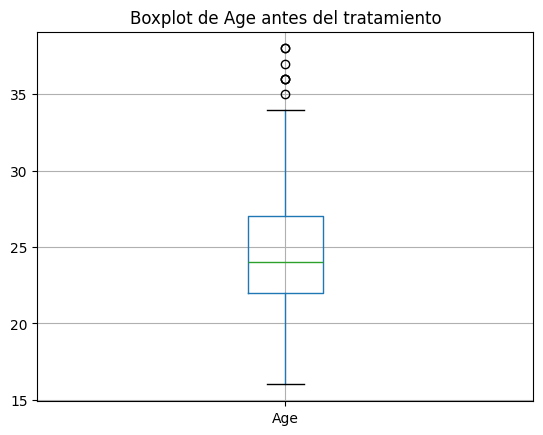

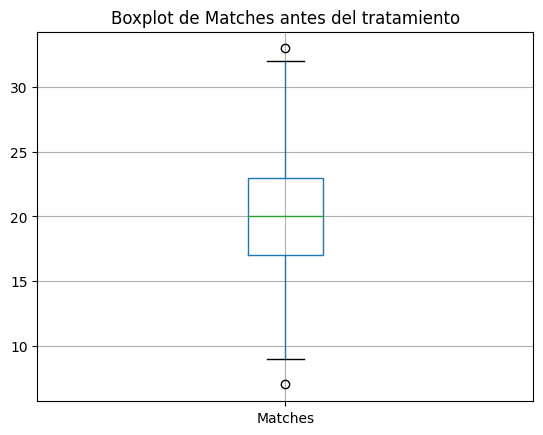

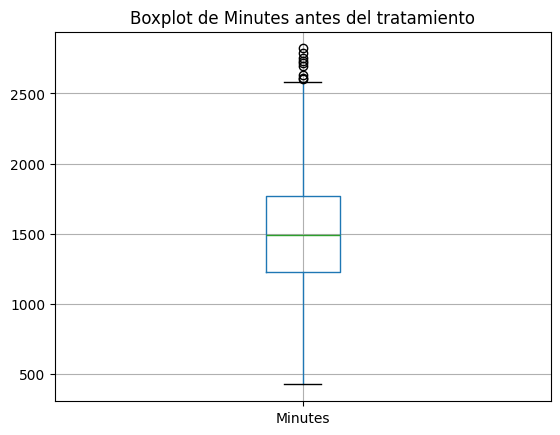

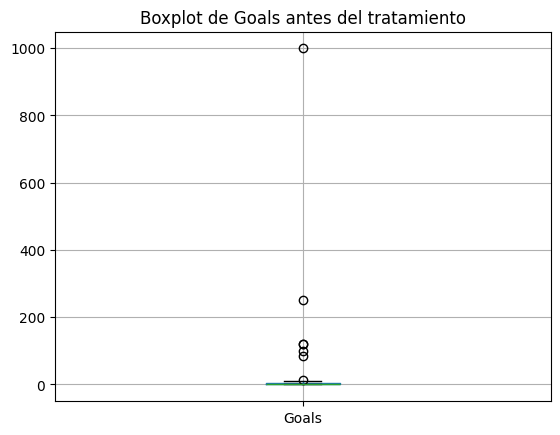

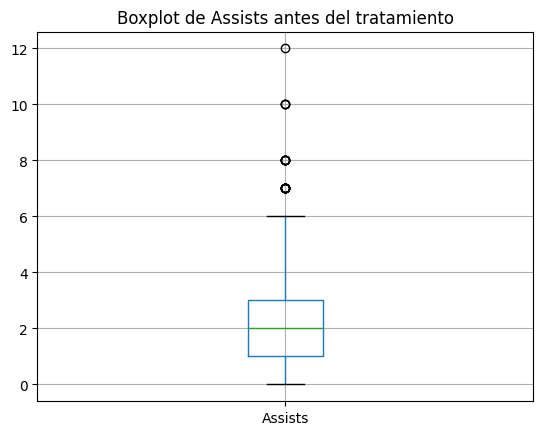

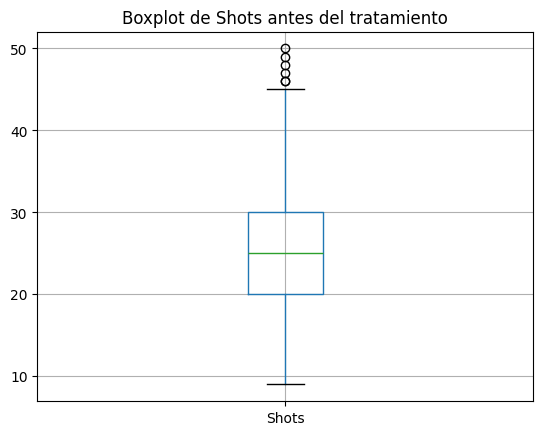

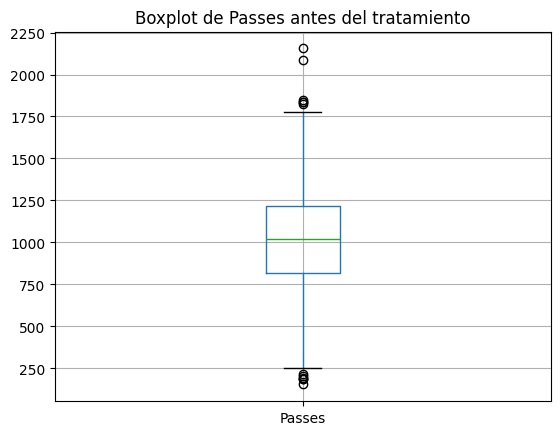

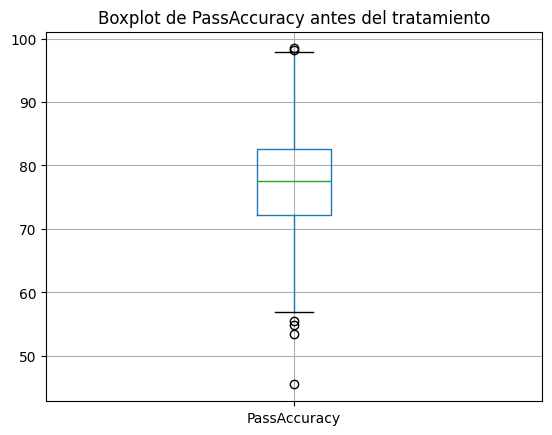

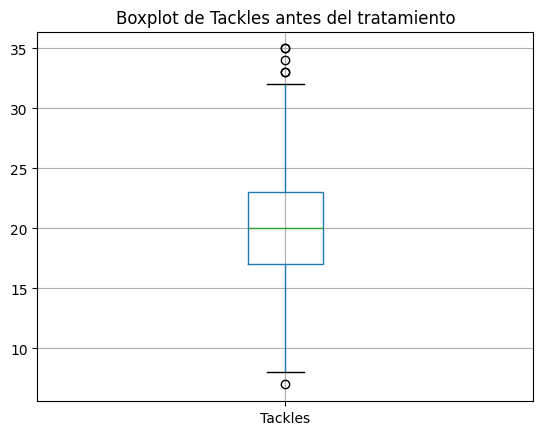

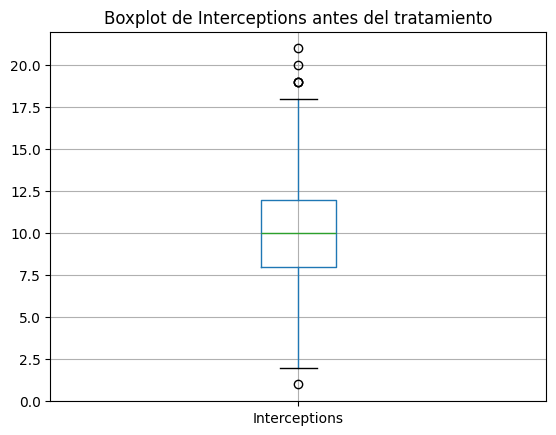

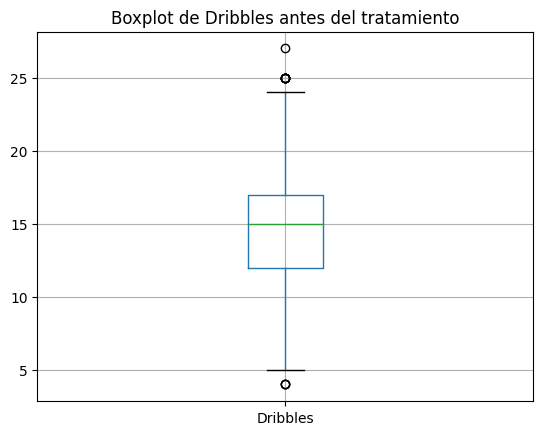

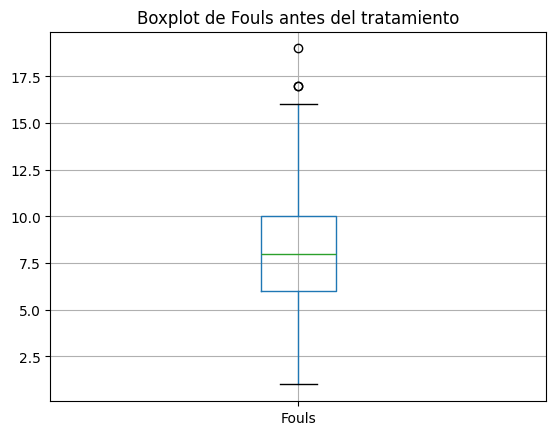

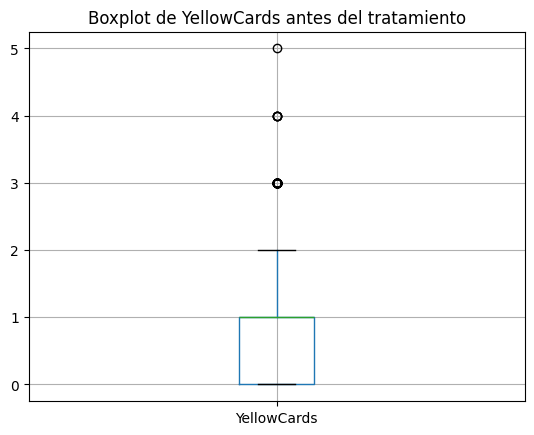

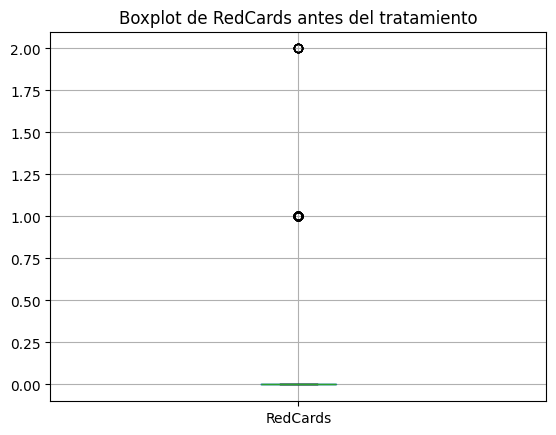

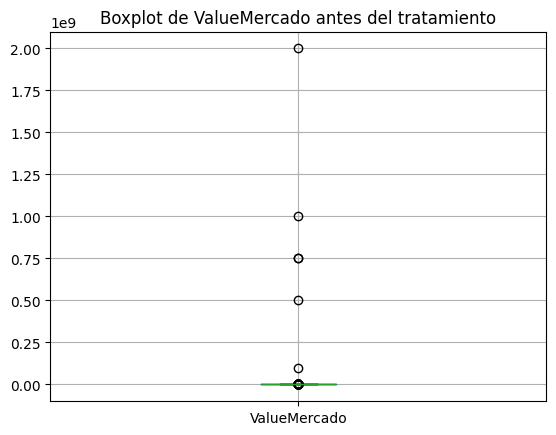

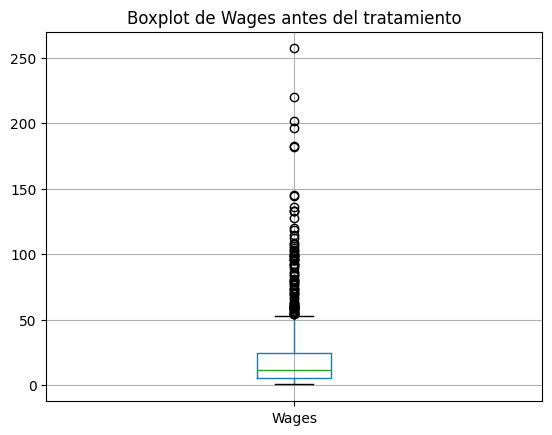

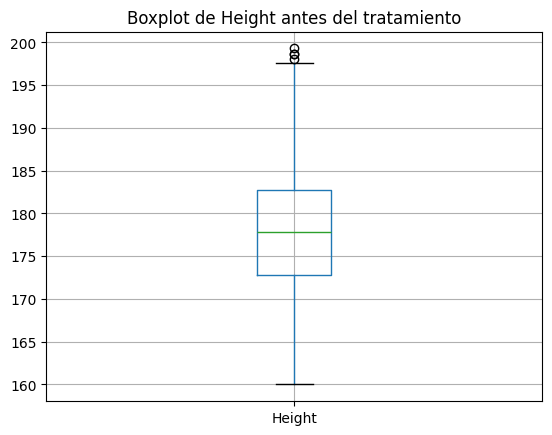

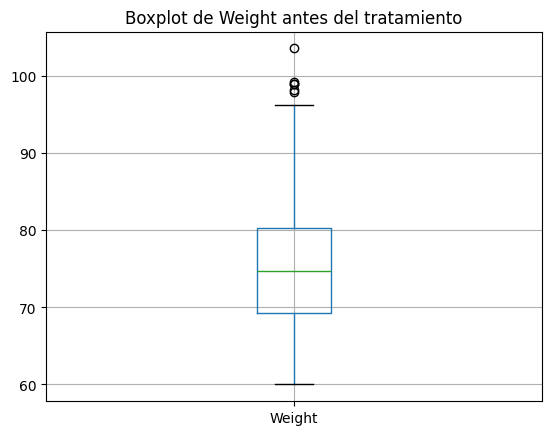

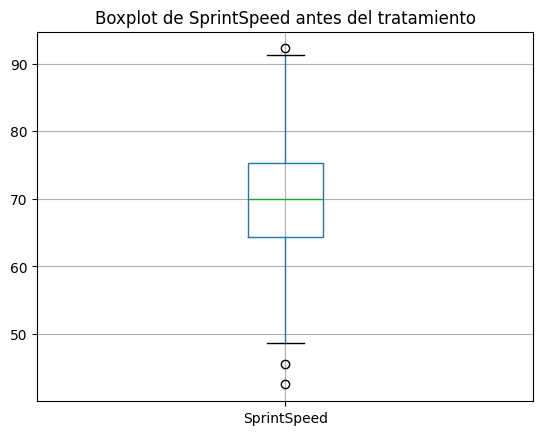

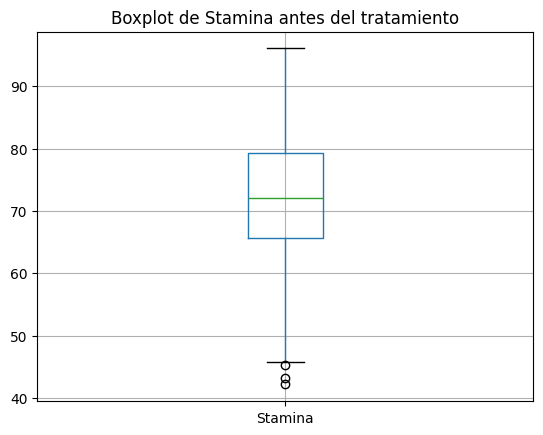

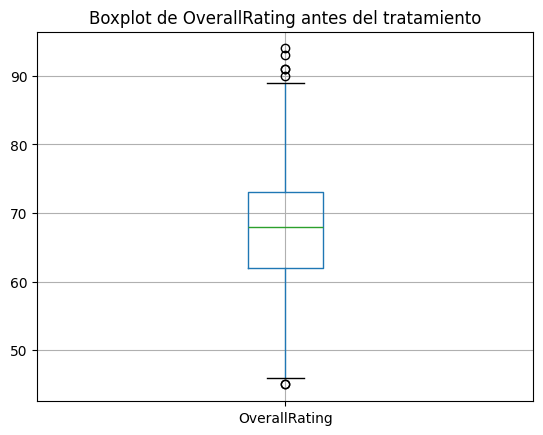

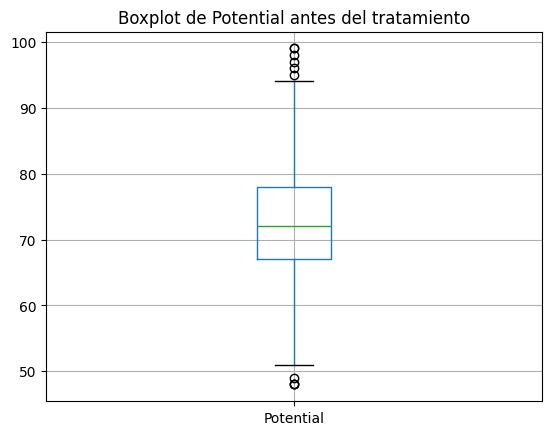

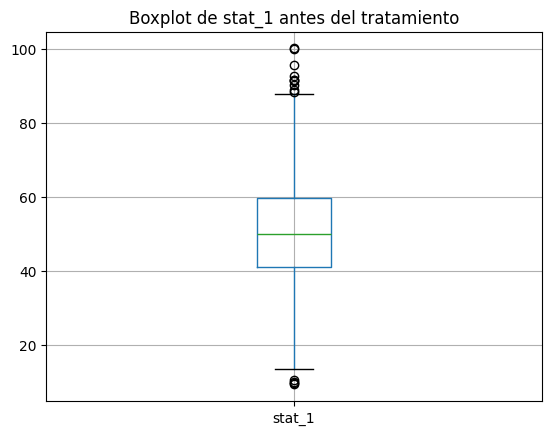

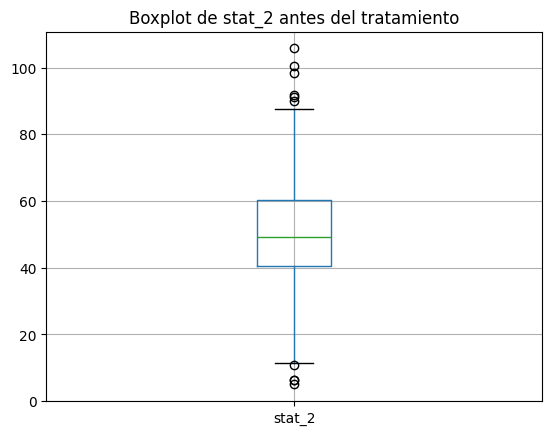

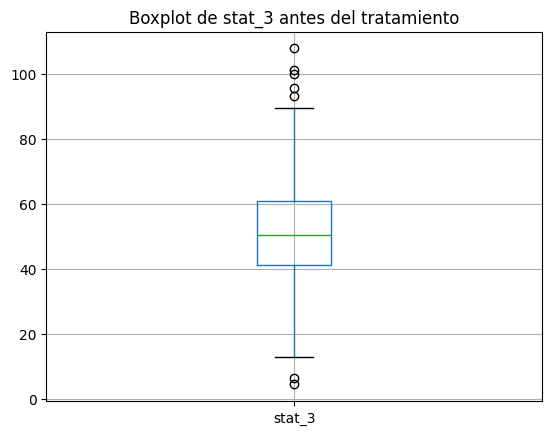

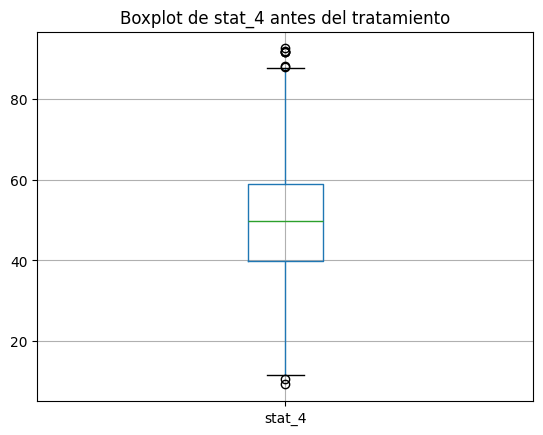

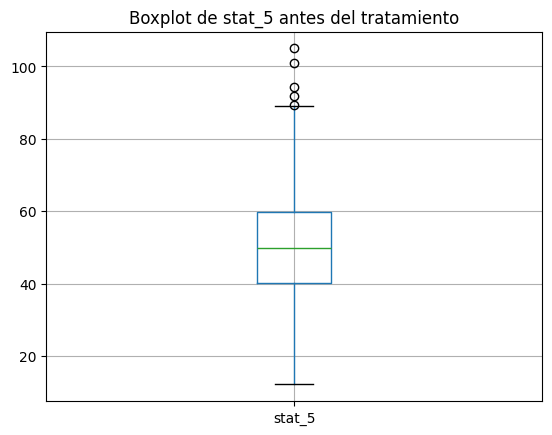

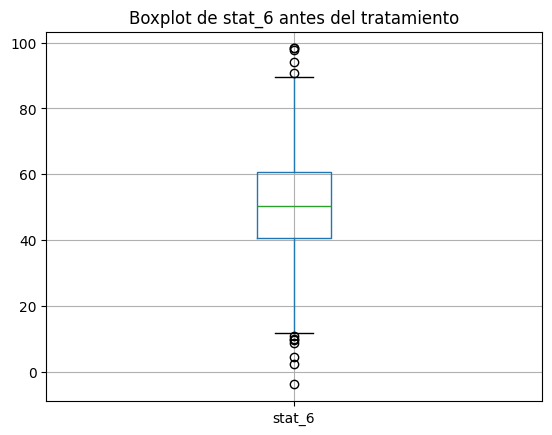

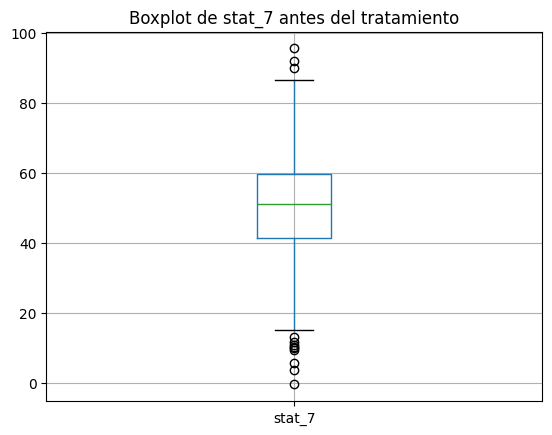

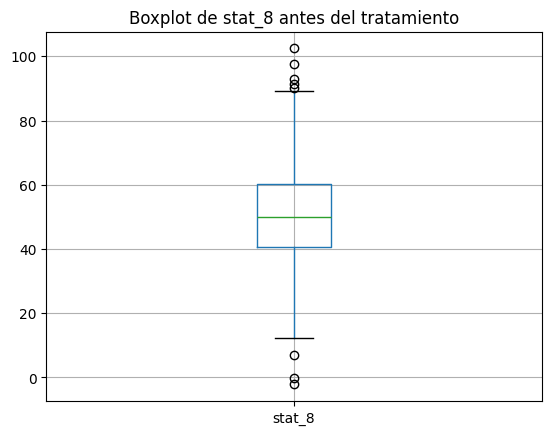

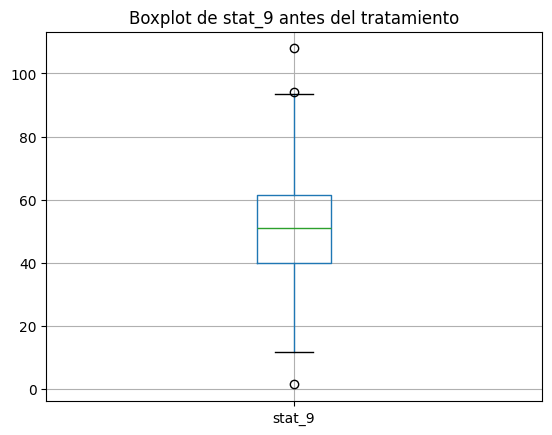

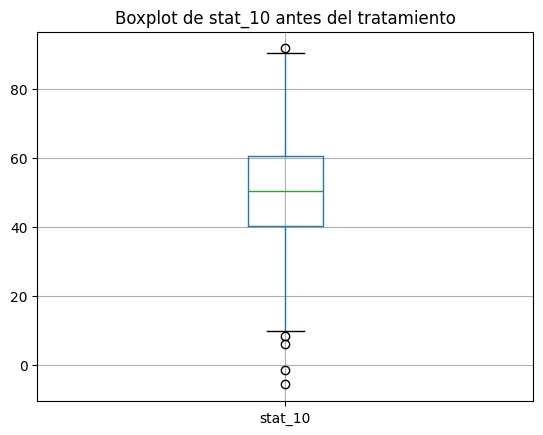

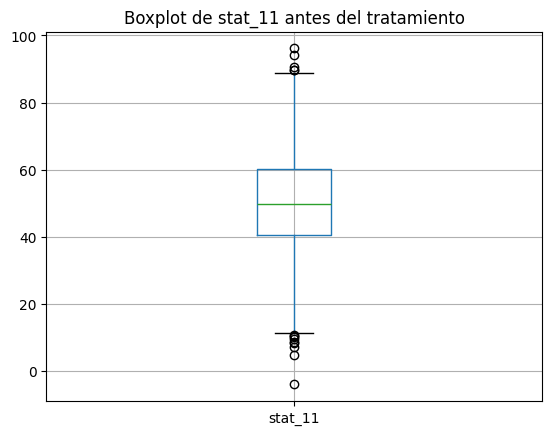

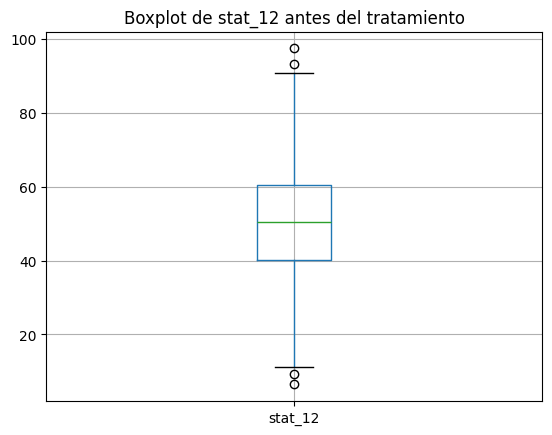

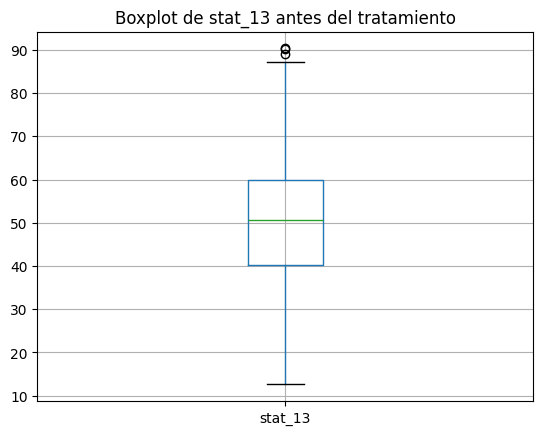

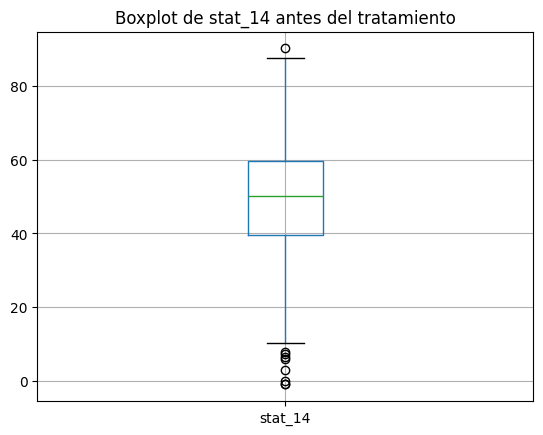

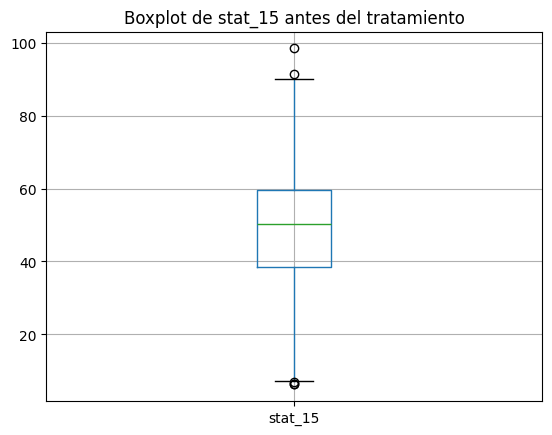

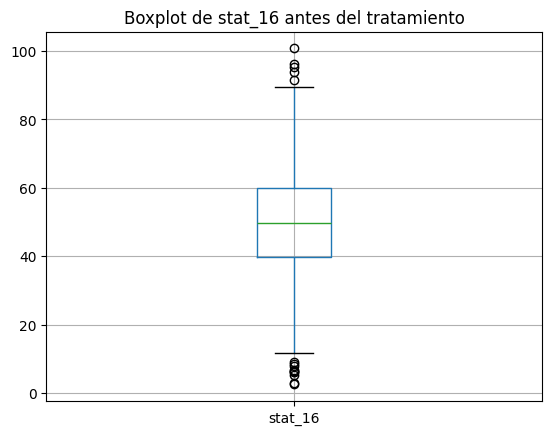

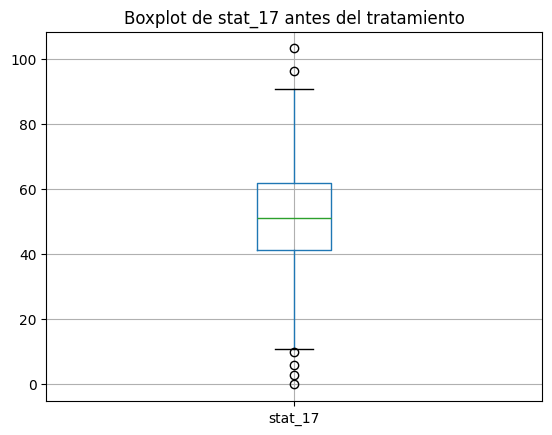

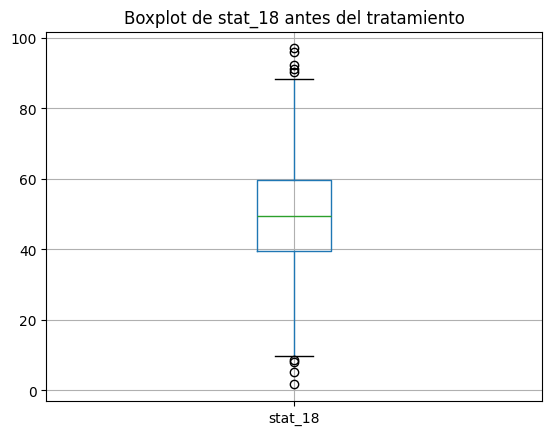

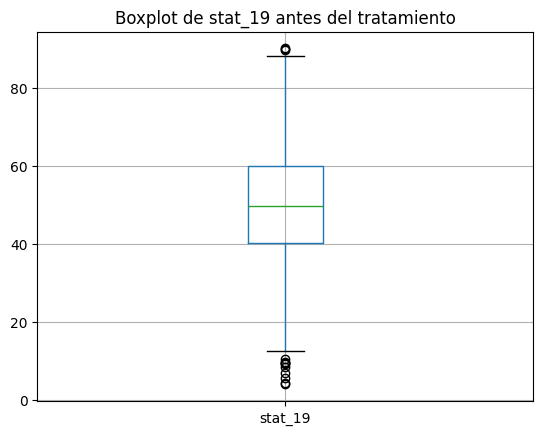

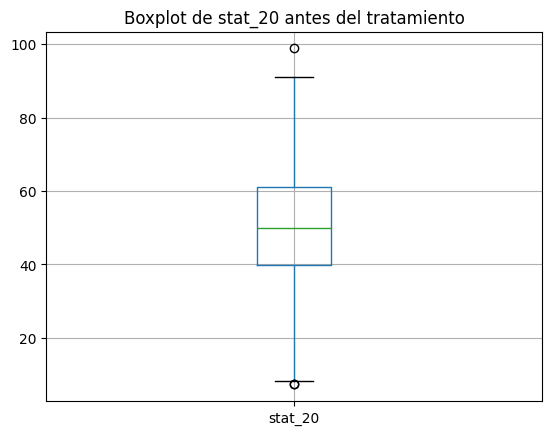

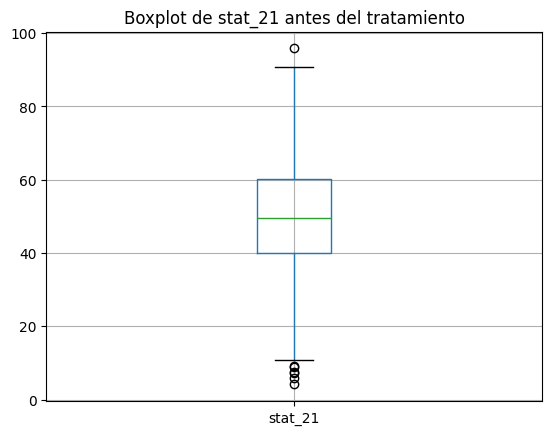

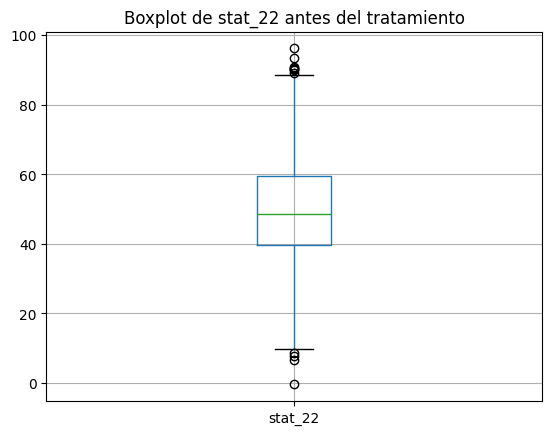

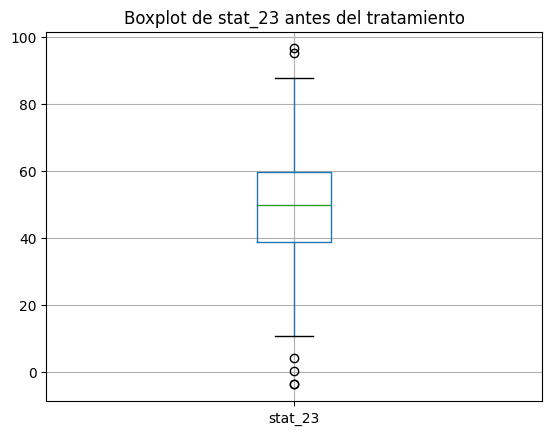

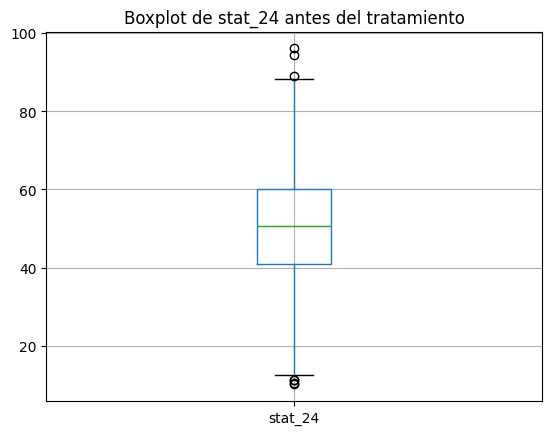

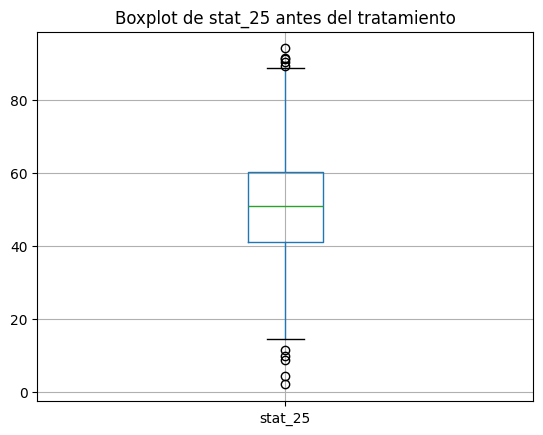

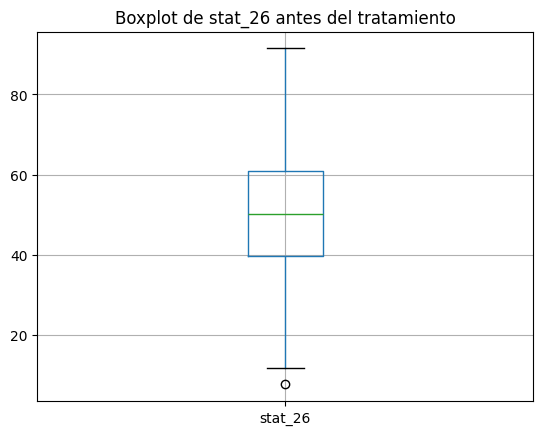

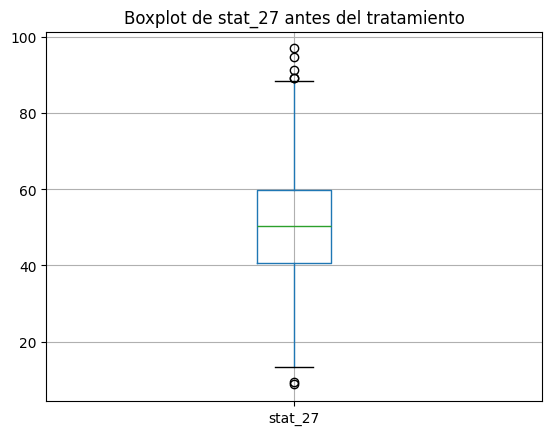

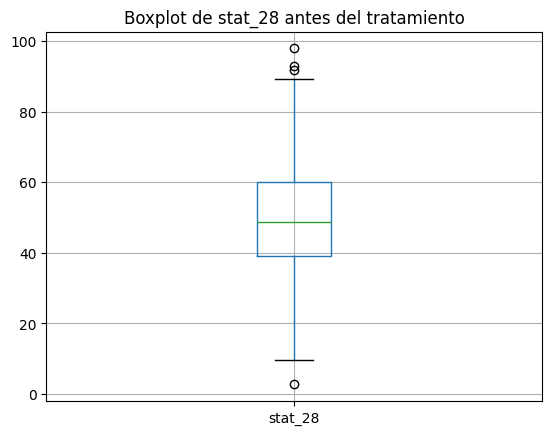

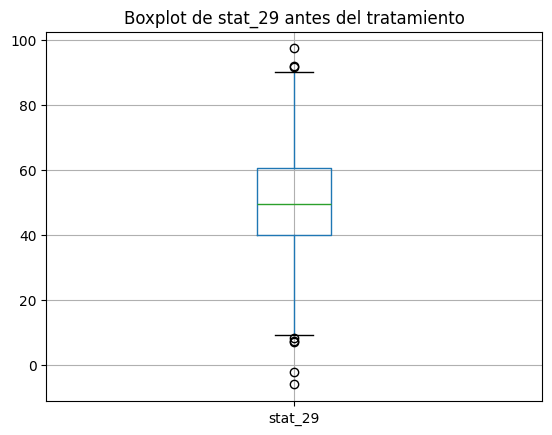

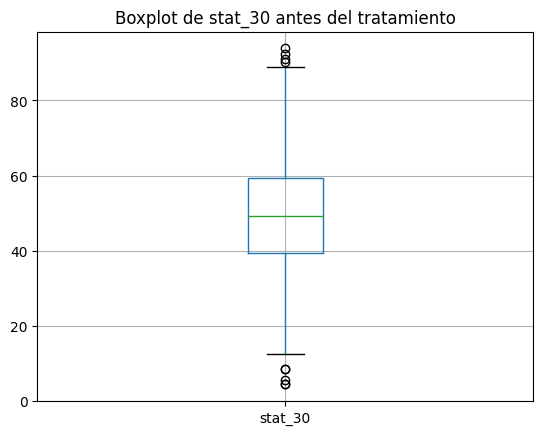

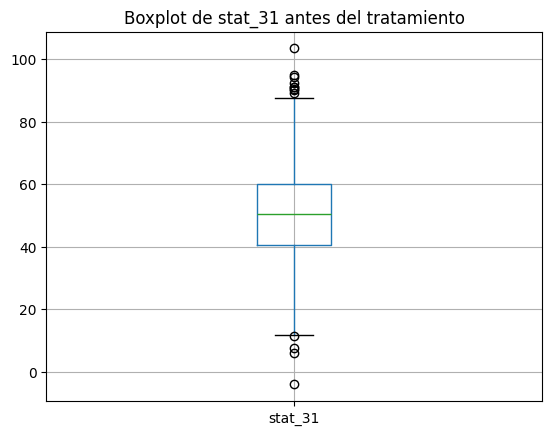

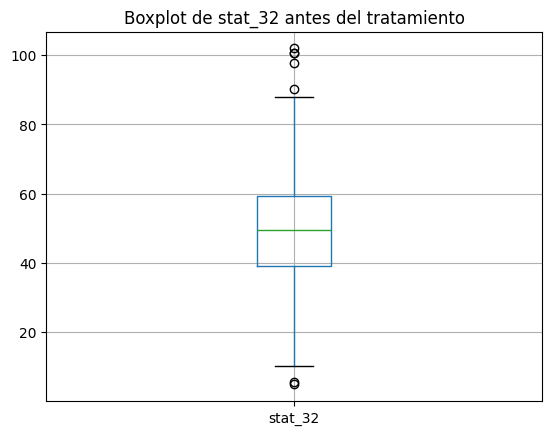

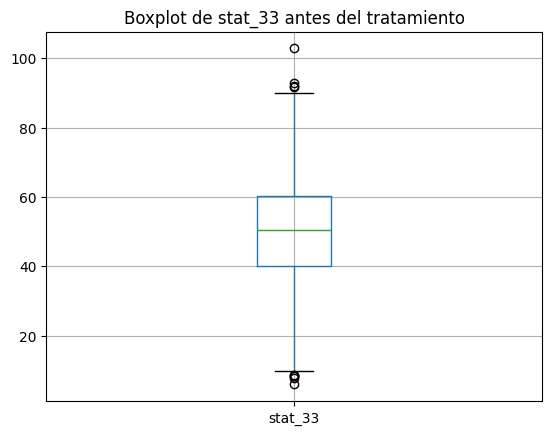

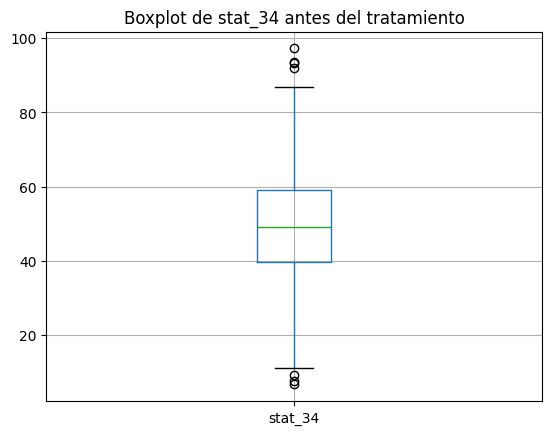

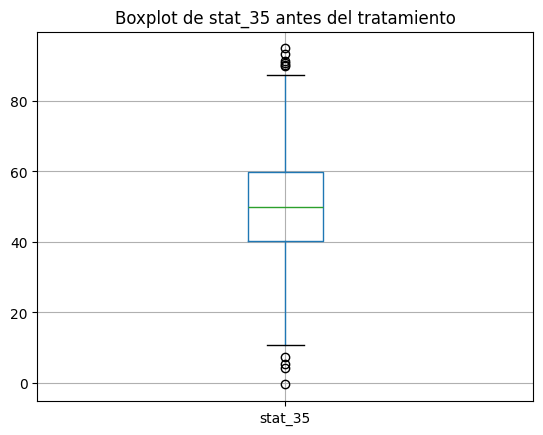

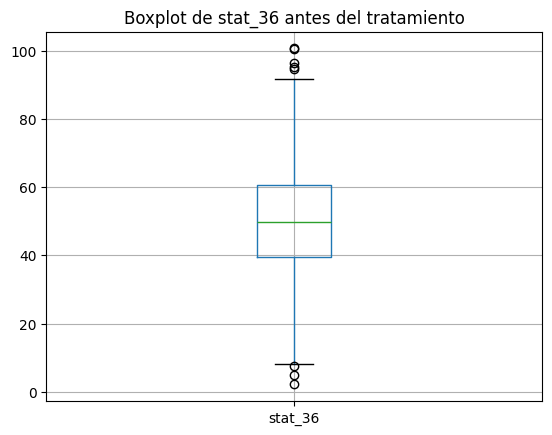

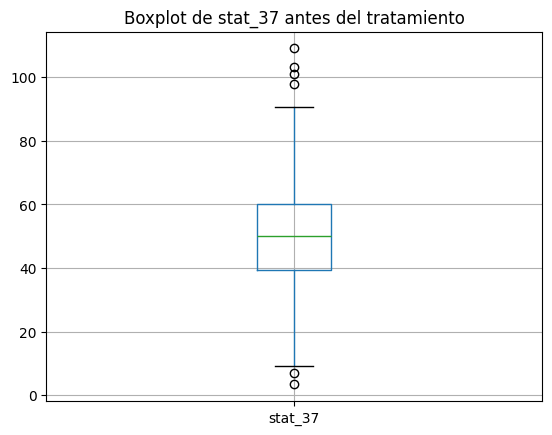

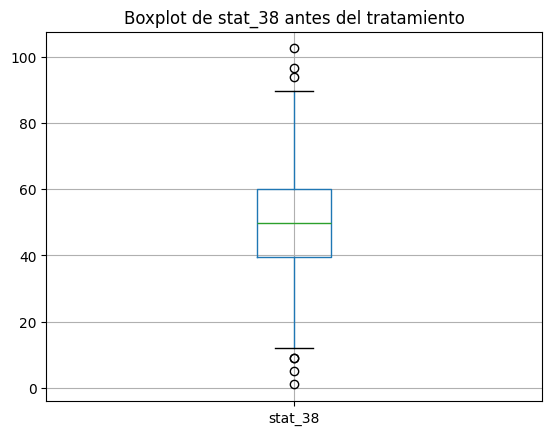

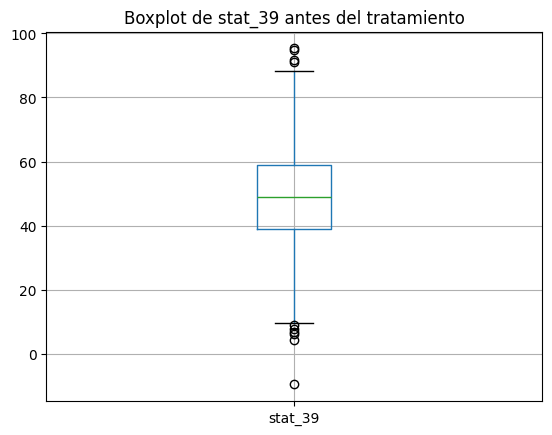

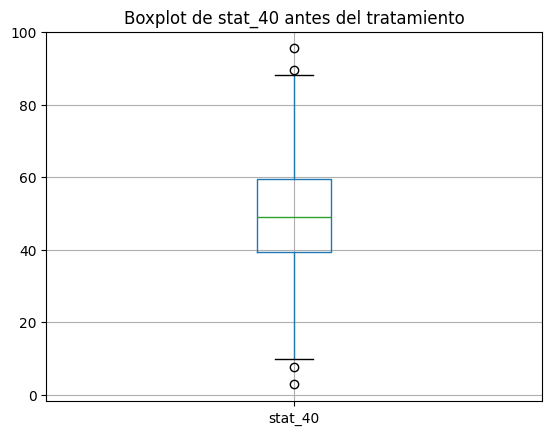

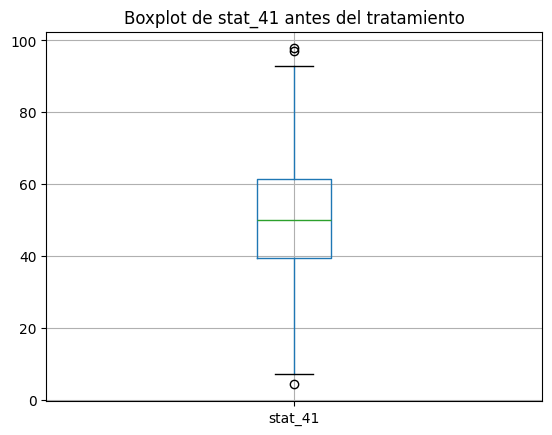

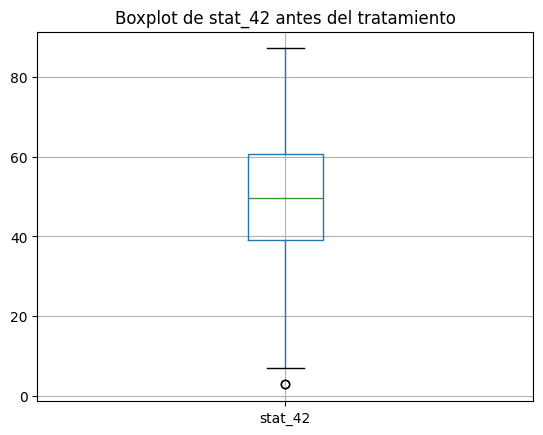

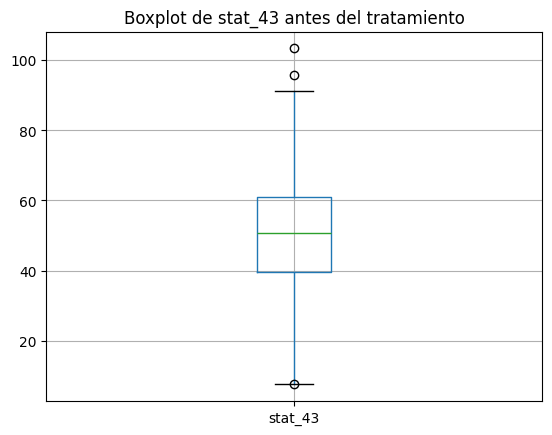

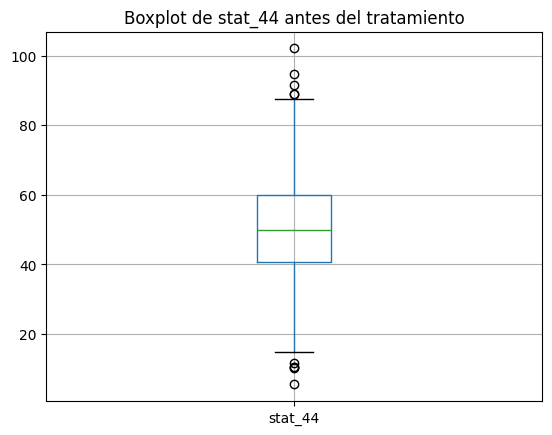

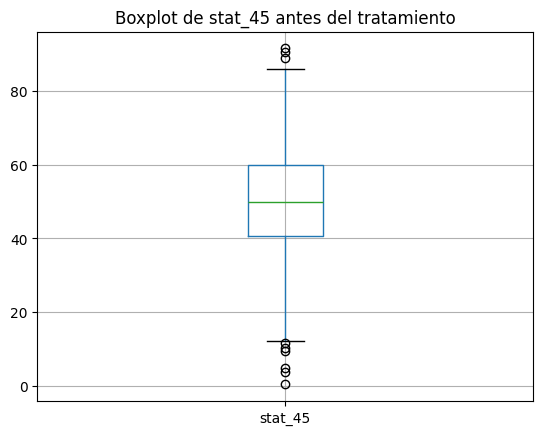

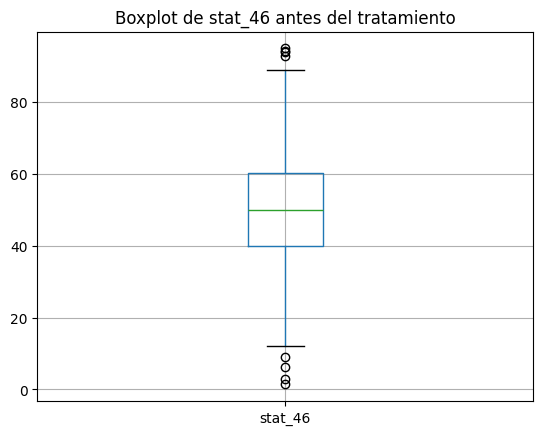

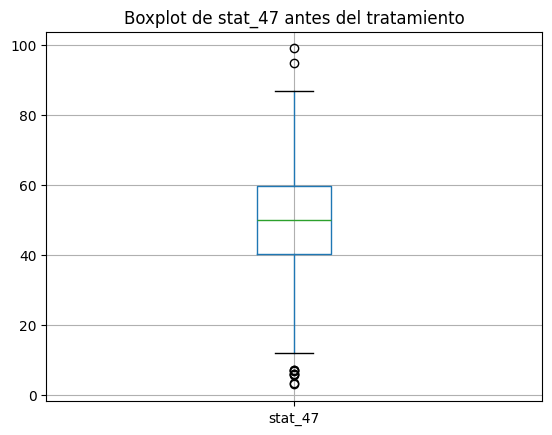

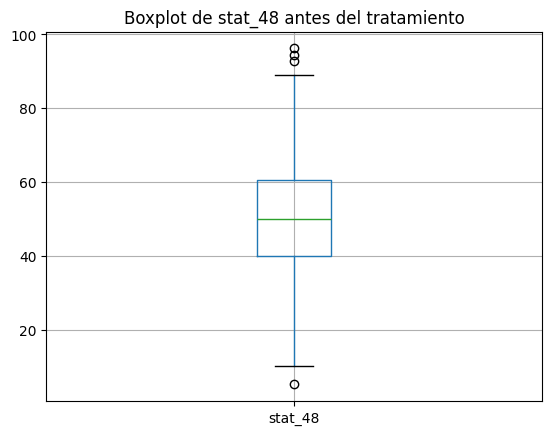

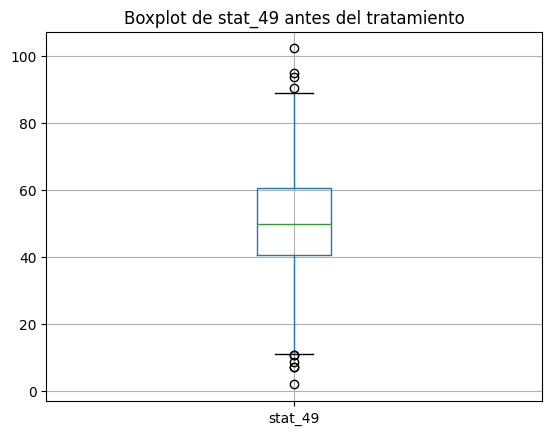

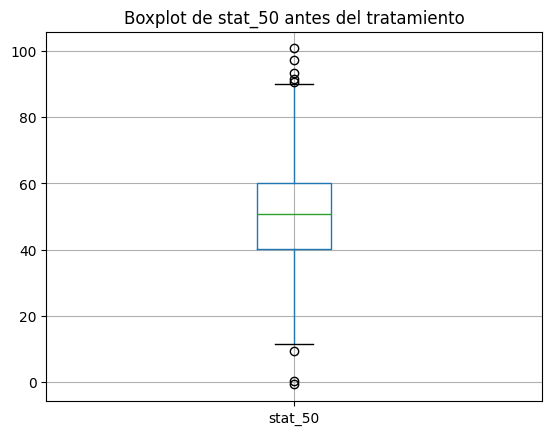

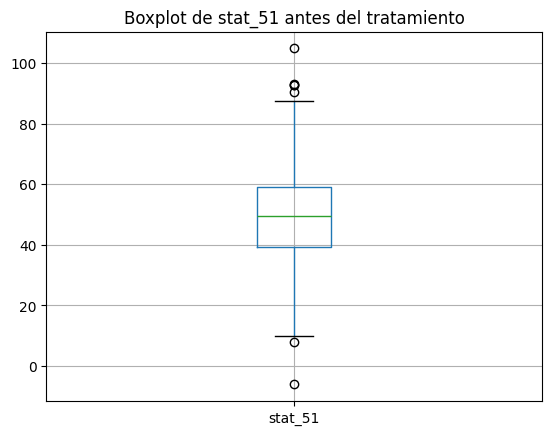

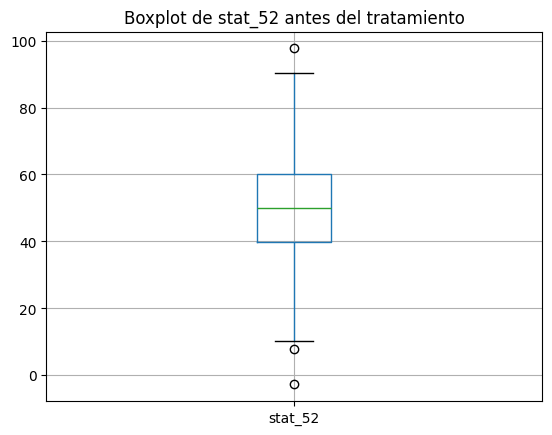

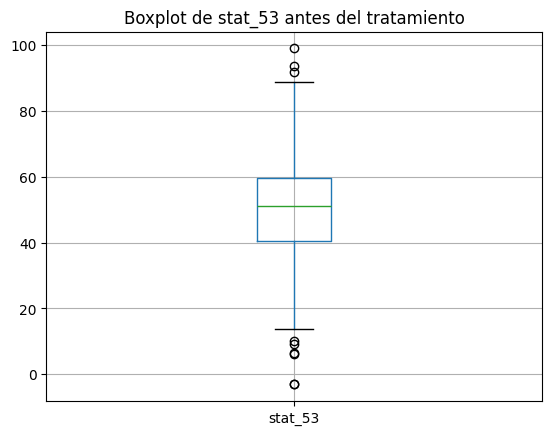

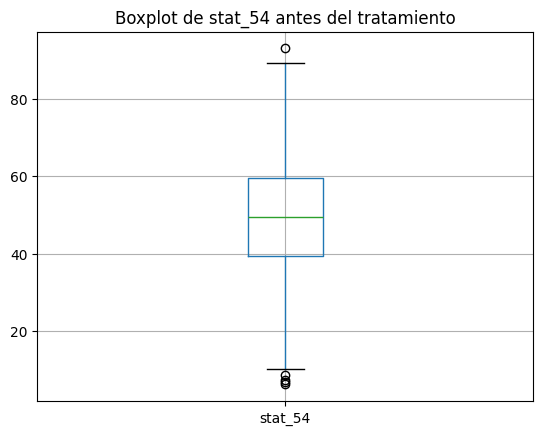

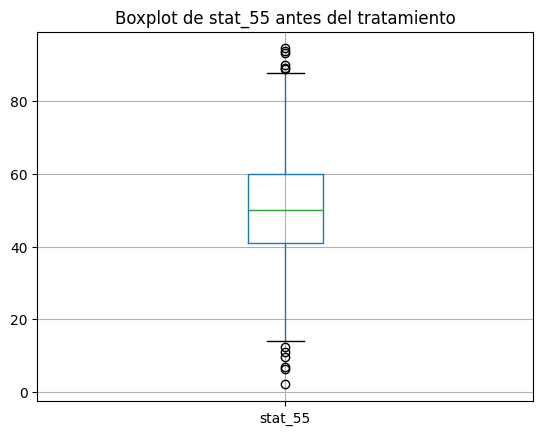

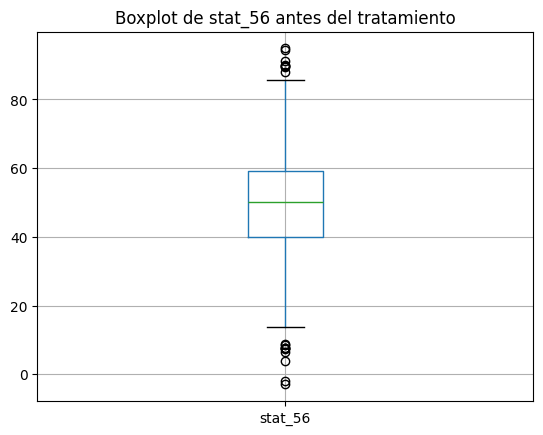

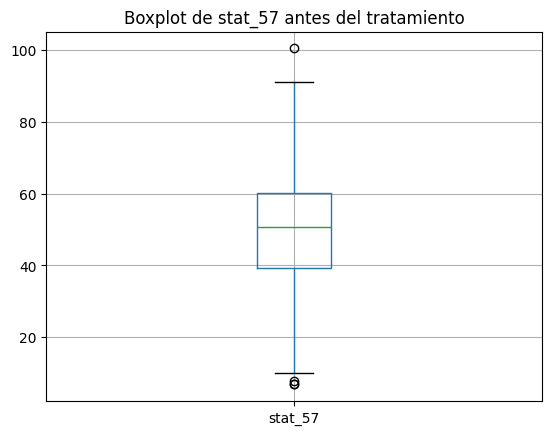

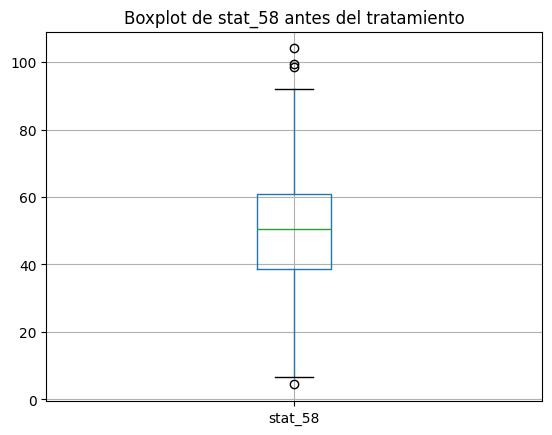

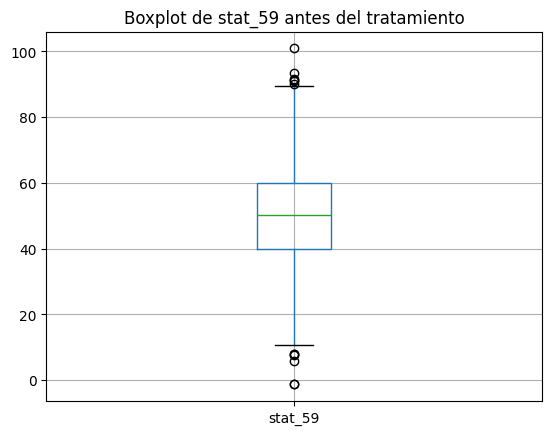

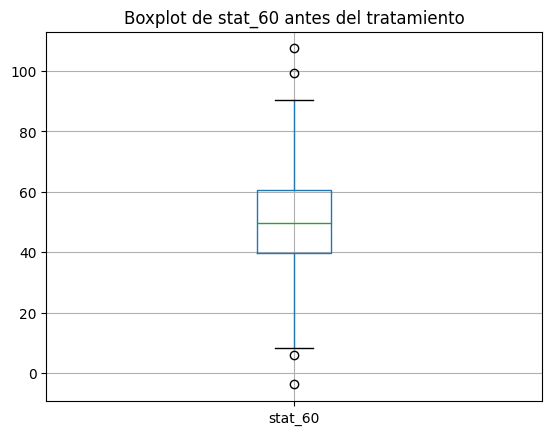

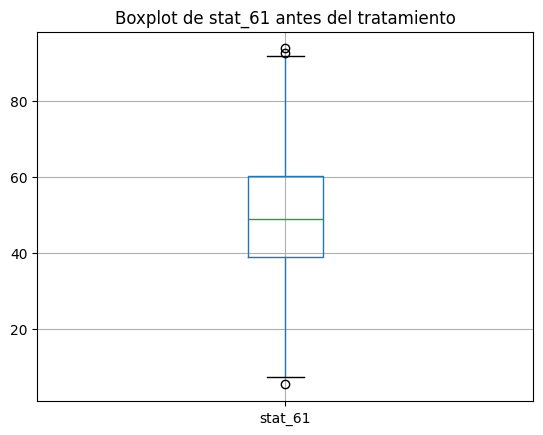

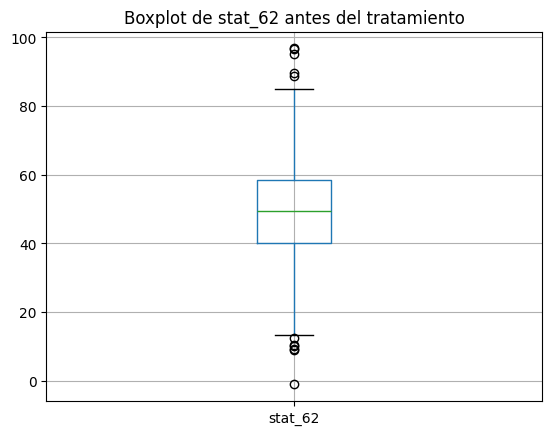

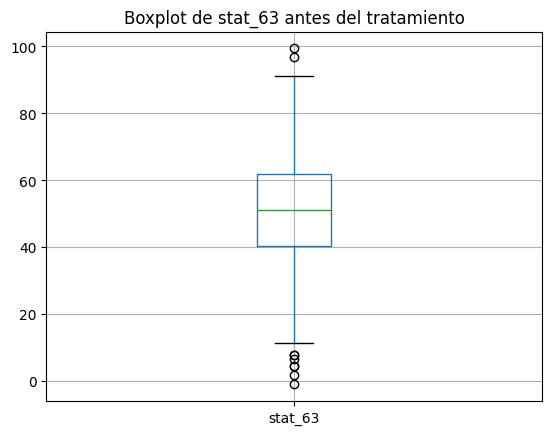

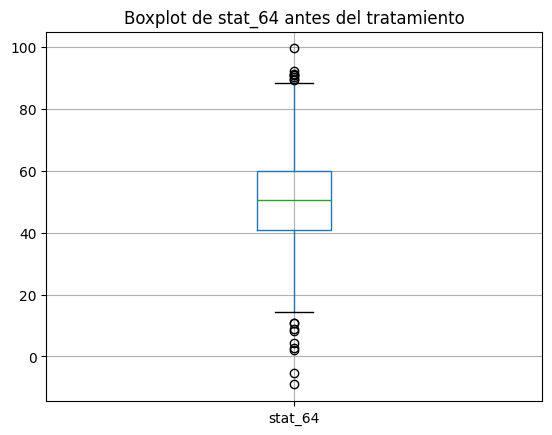

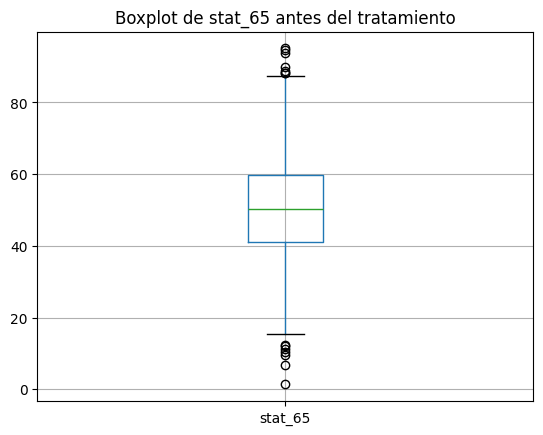

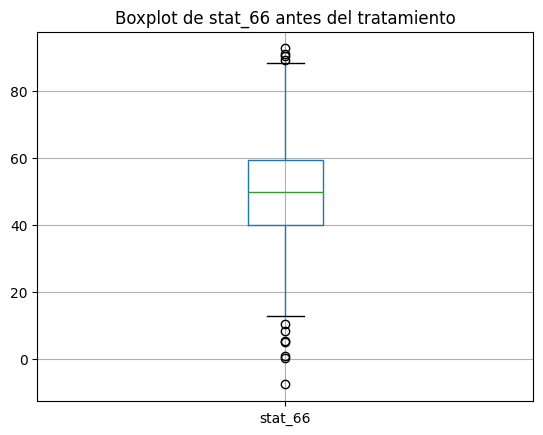

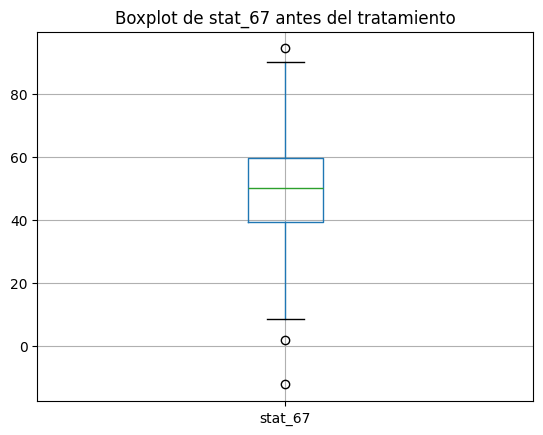

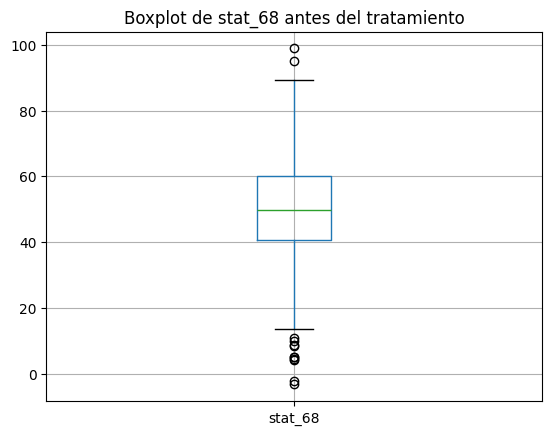

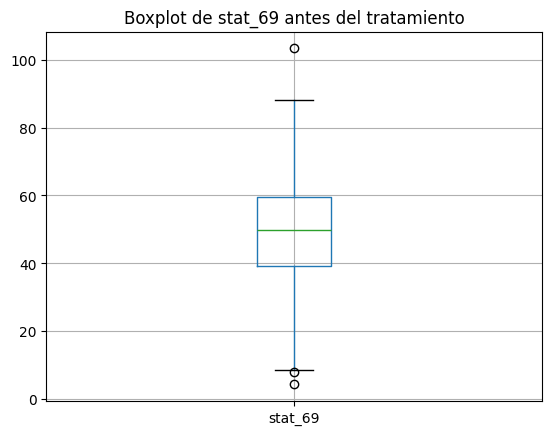

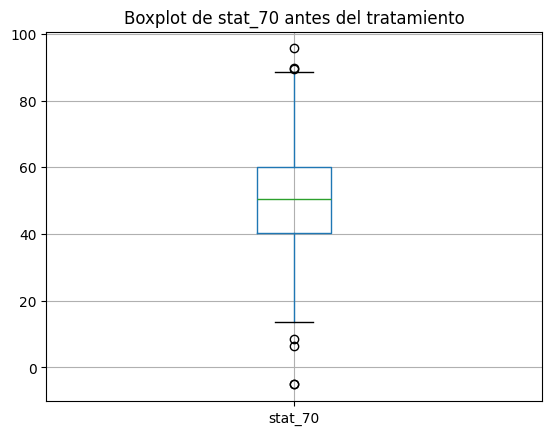

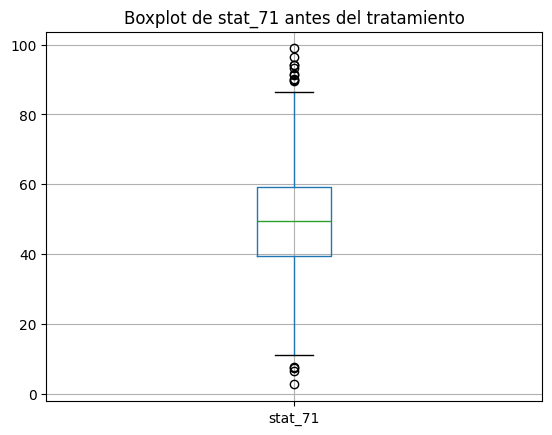

Graficos boxplots después del tratamiento


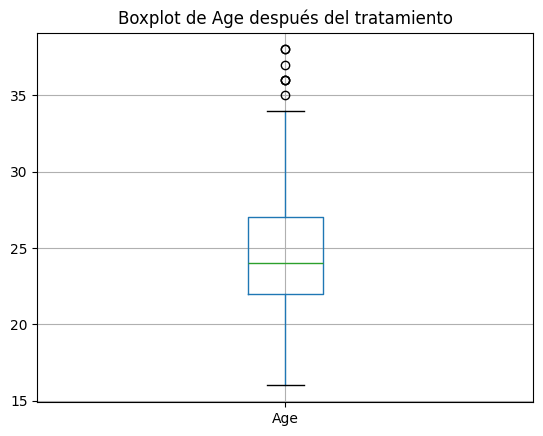

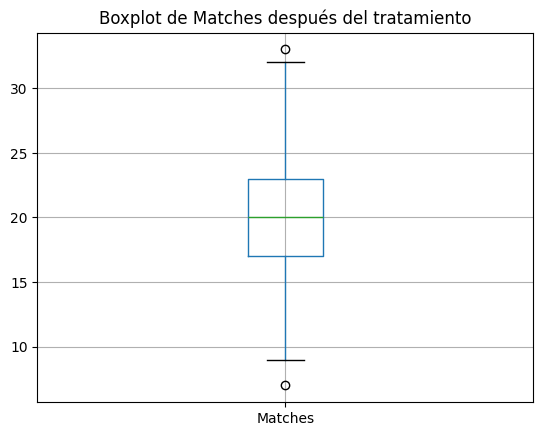

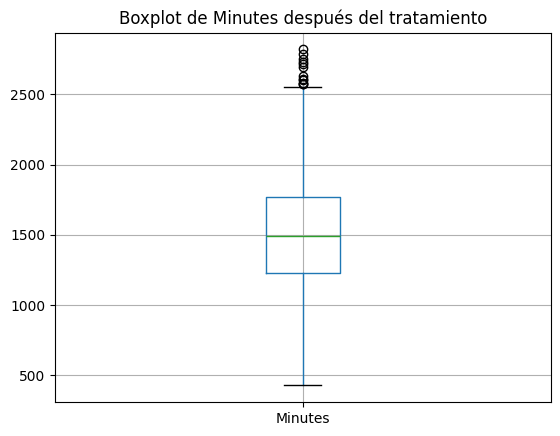

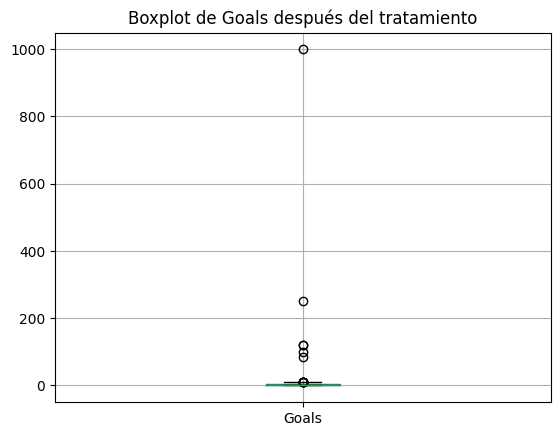

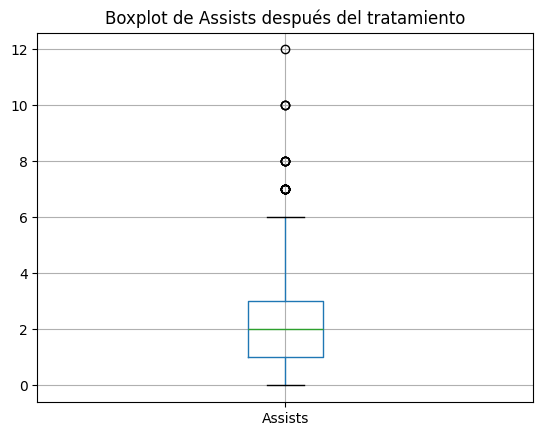

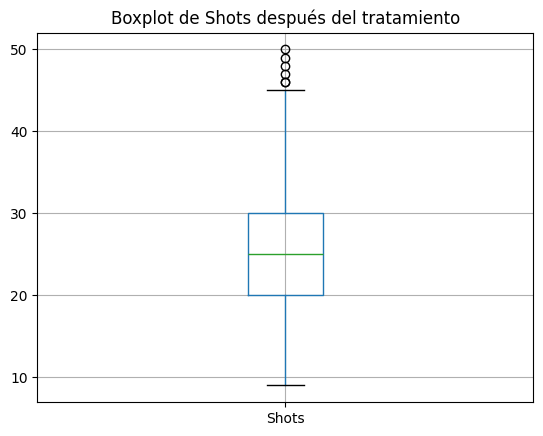

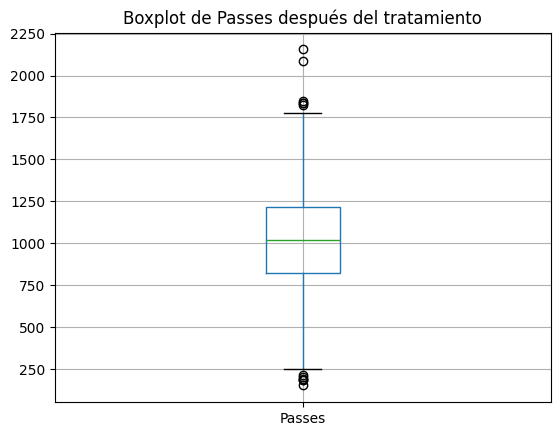

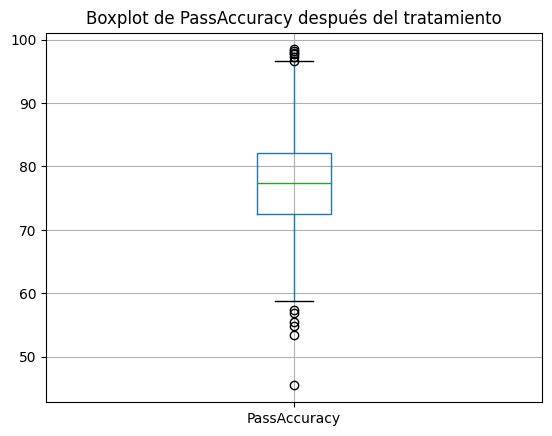

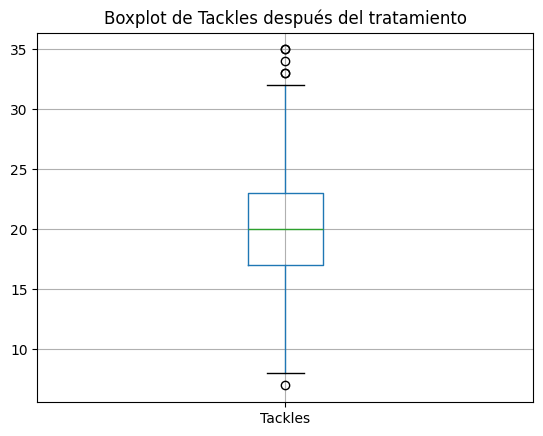

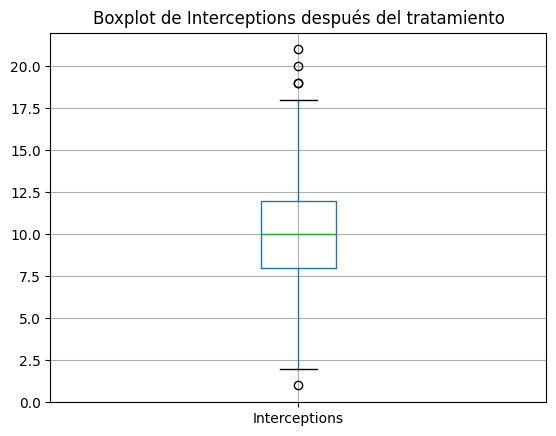

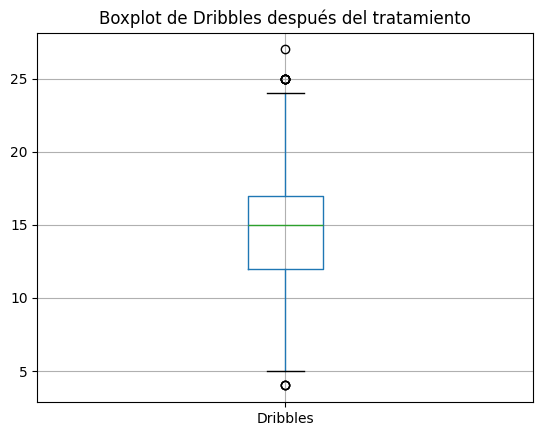

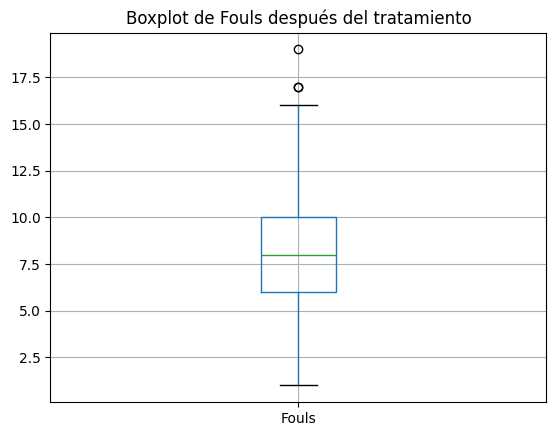

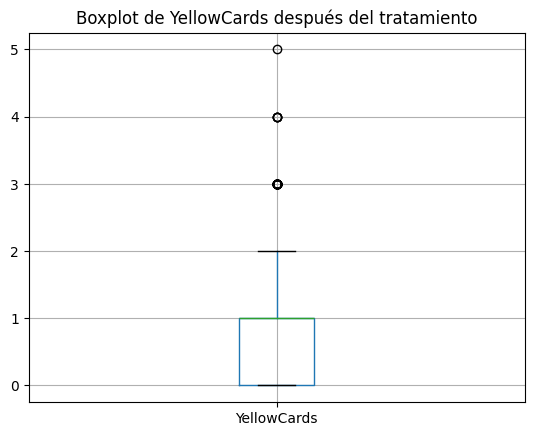

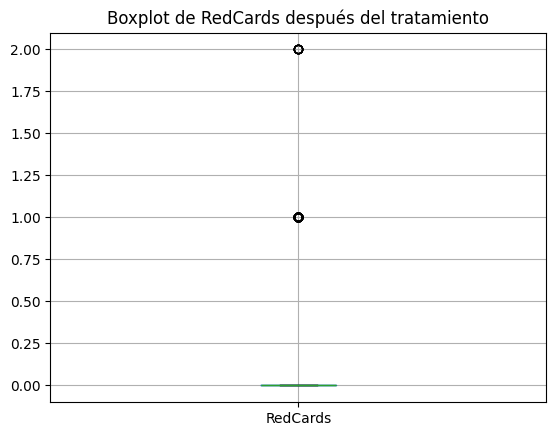

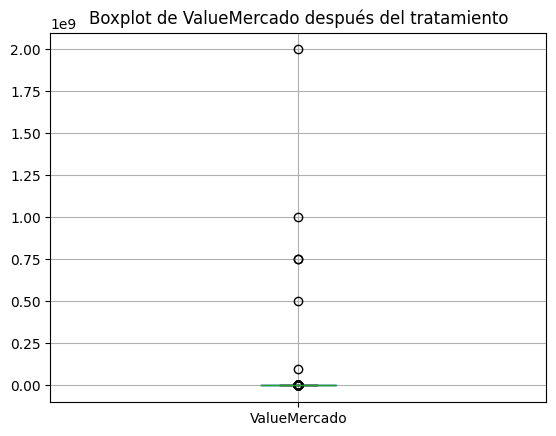

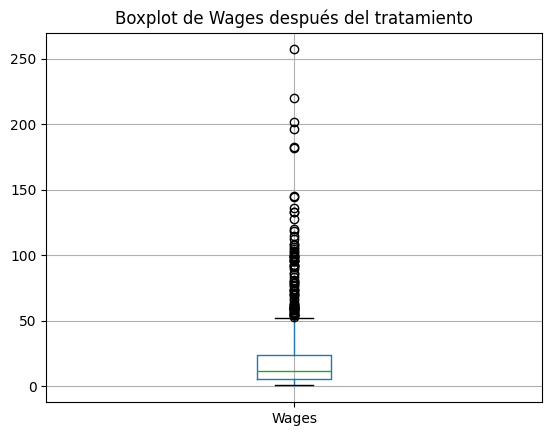

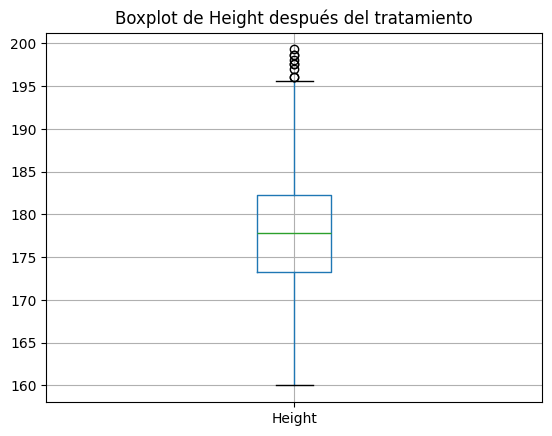

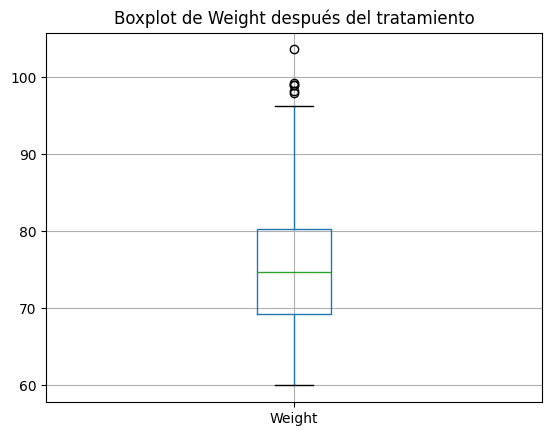

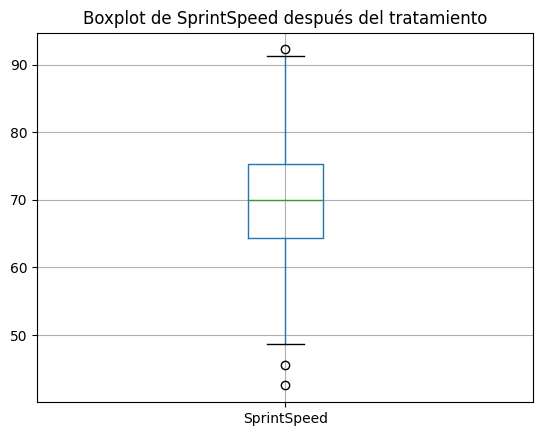

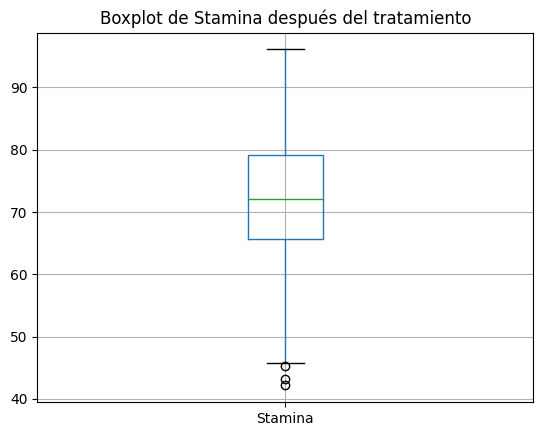

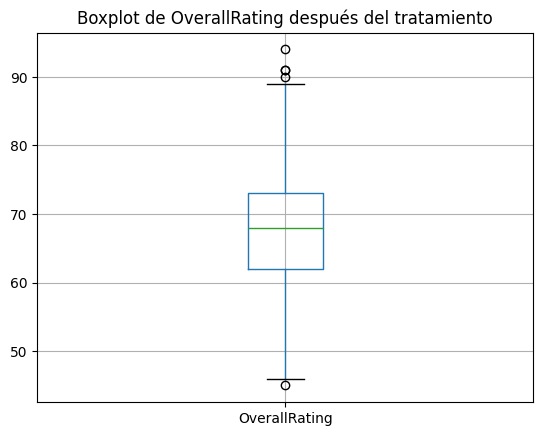

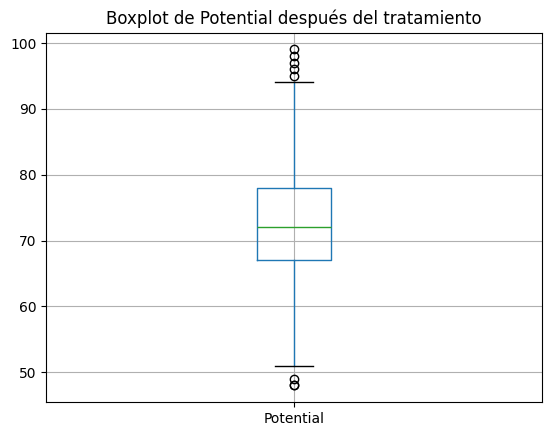

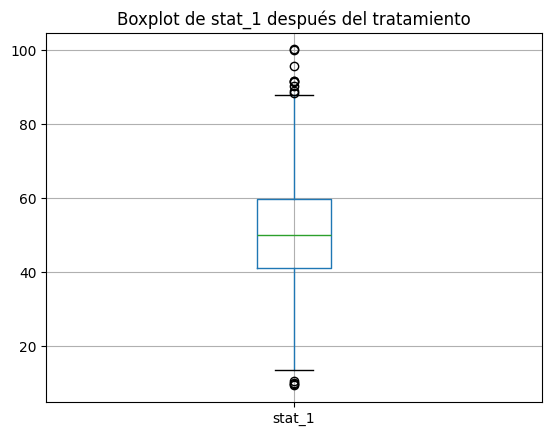

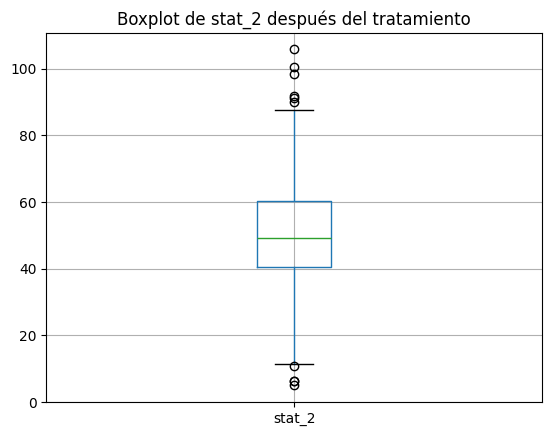

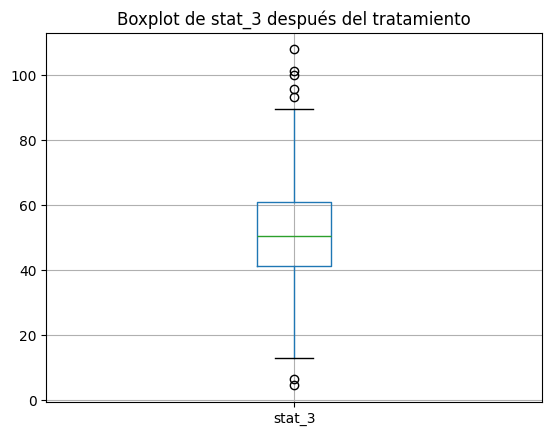

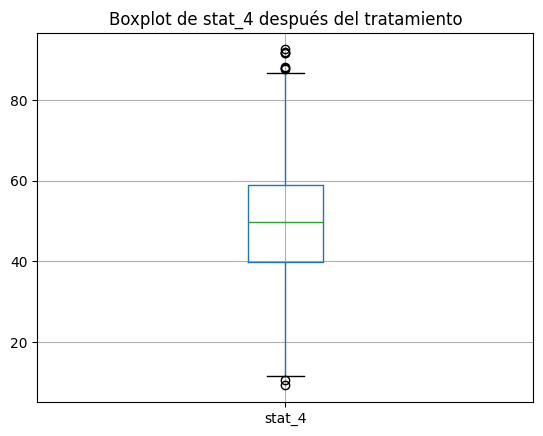

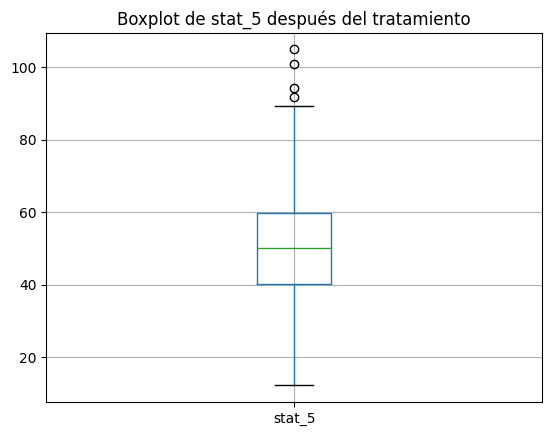

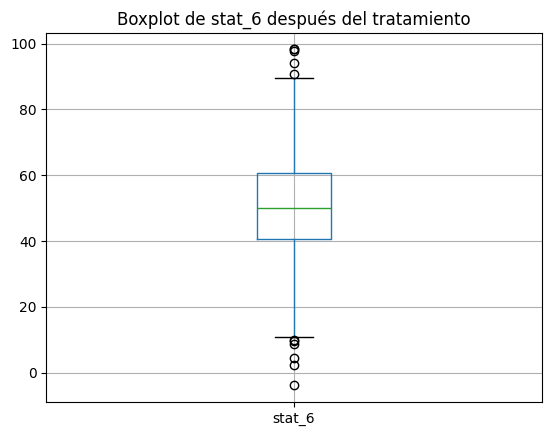

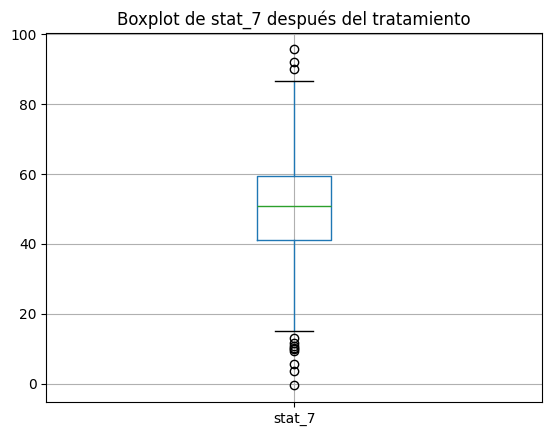

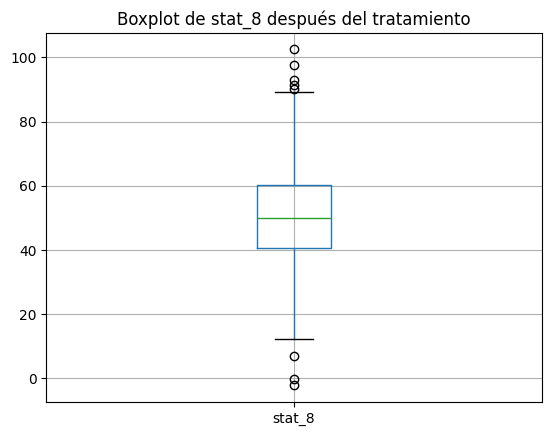

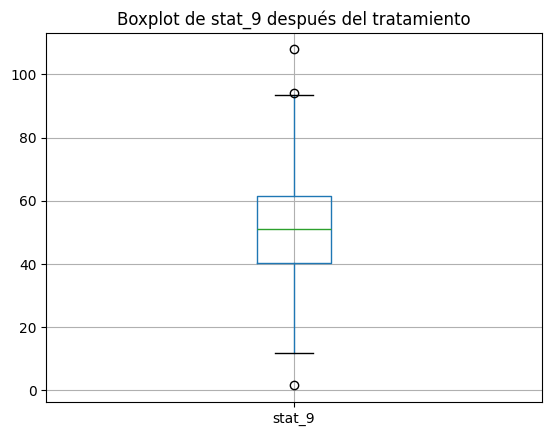

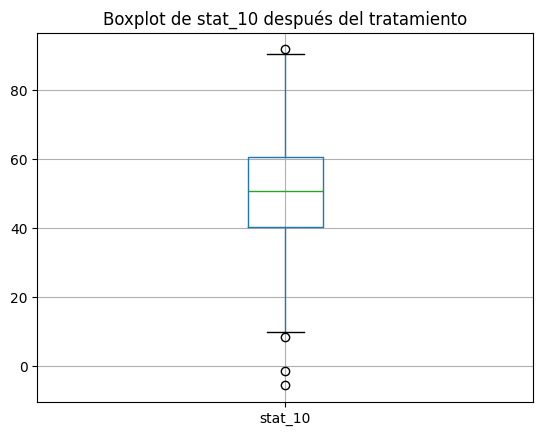

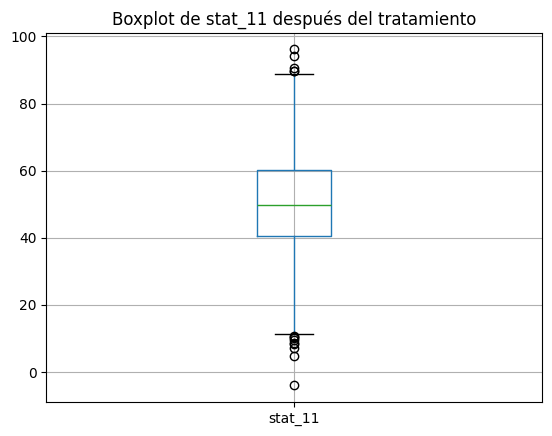

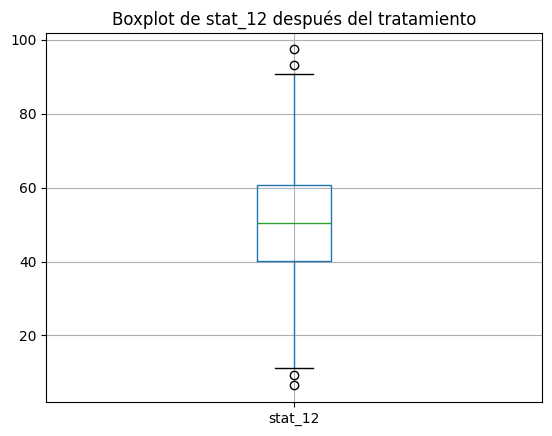

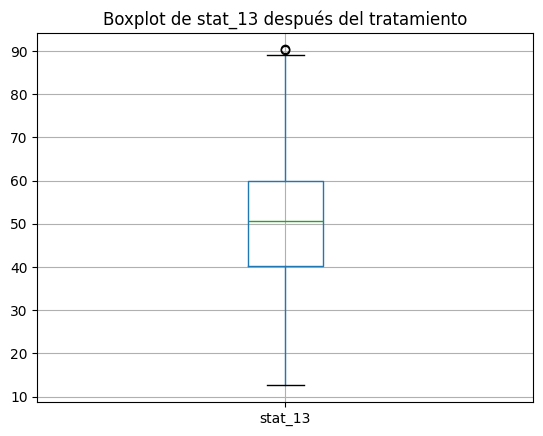

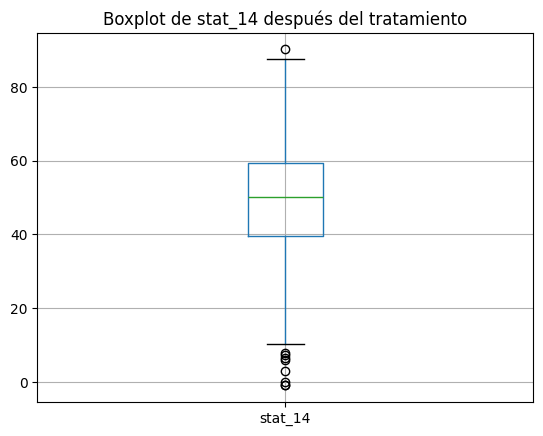

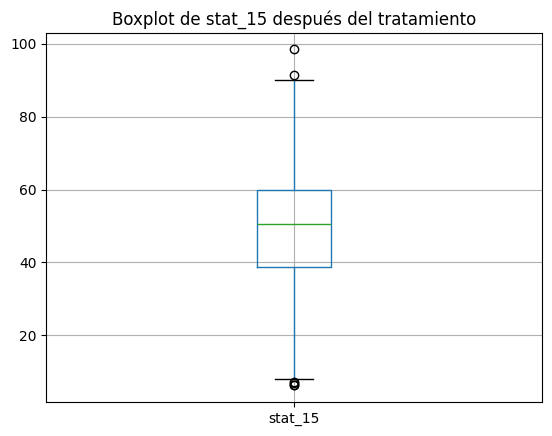

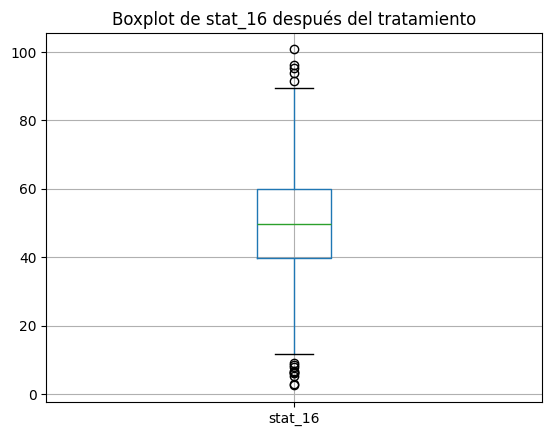

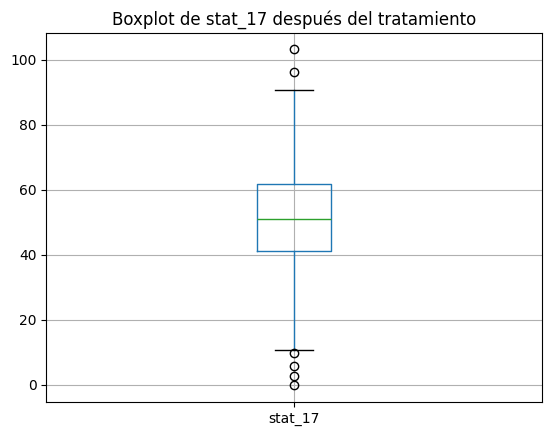

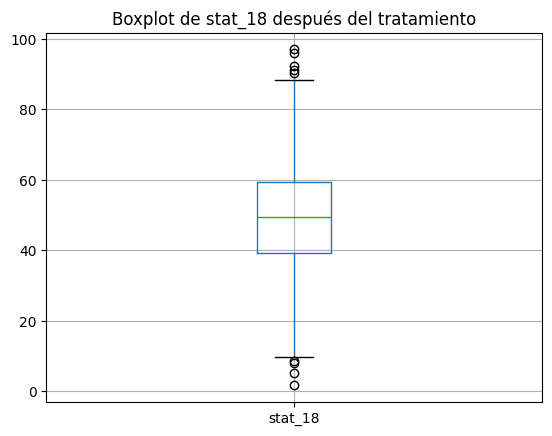

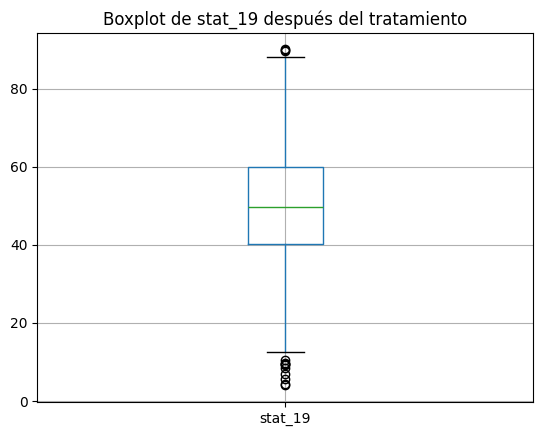

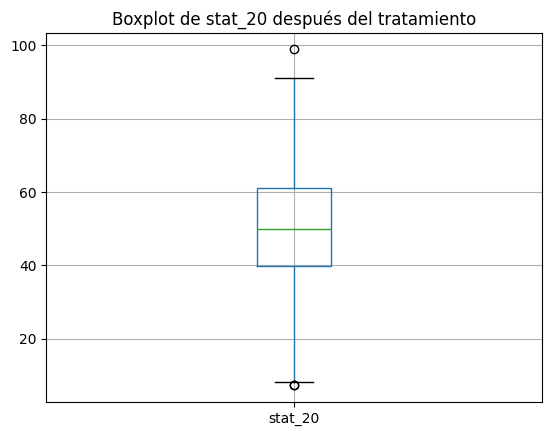

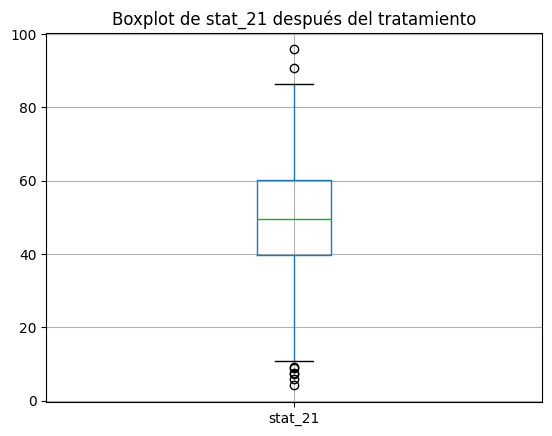

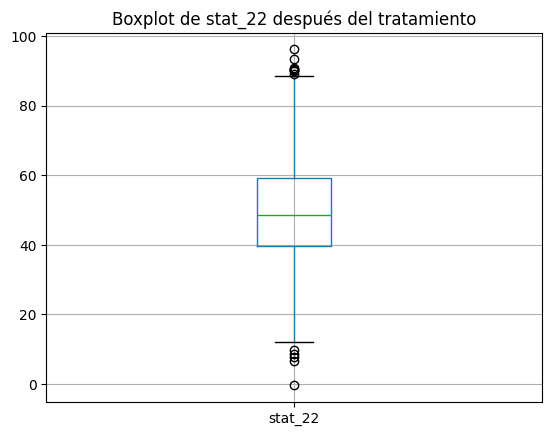

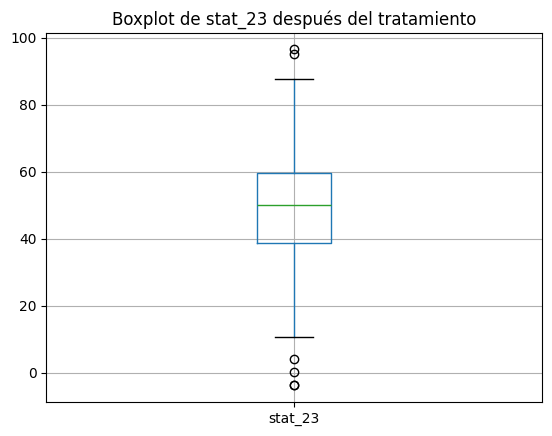

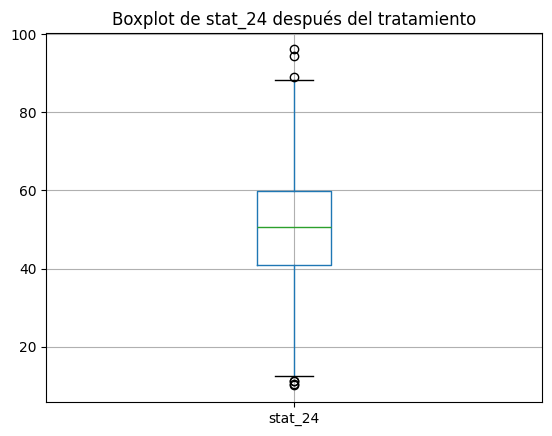

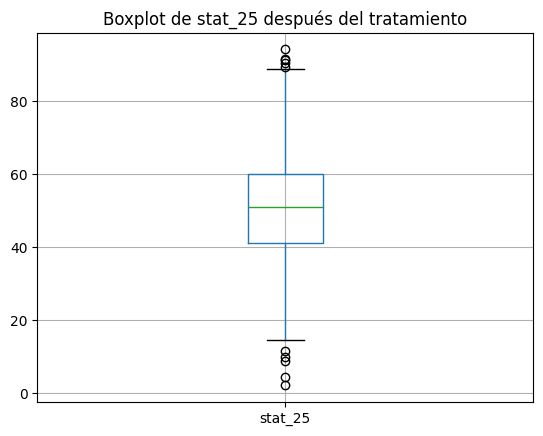

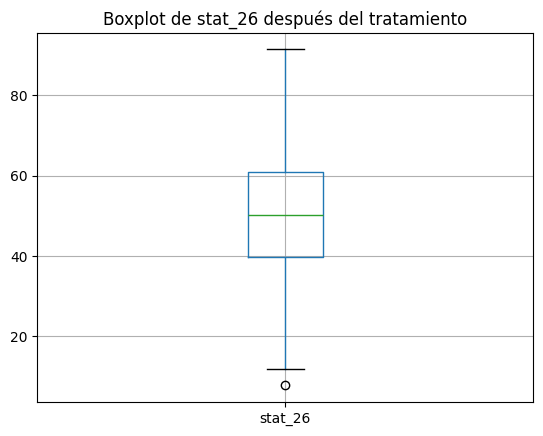

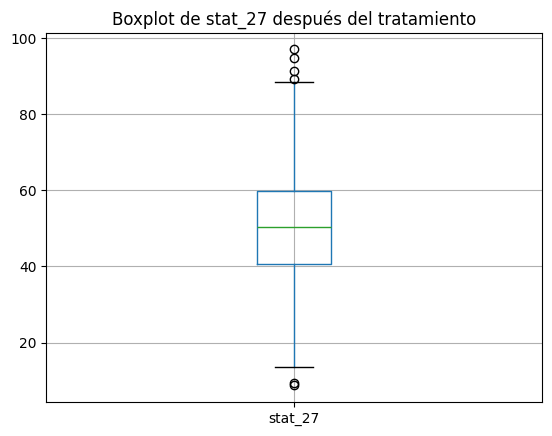

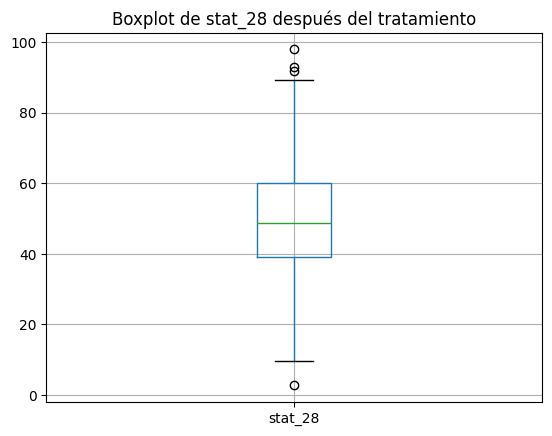

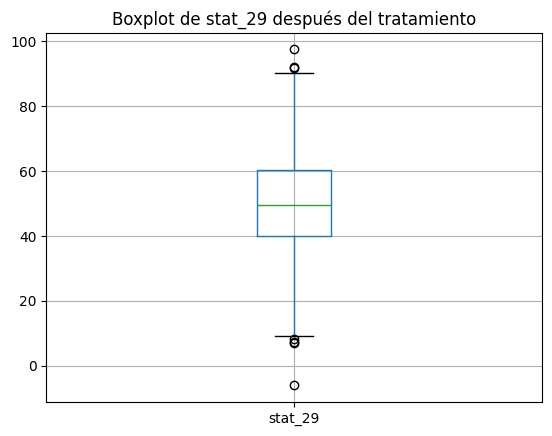

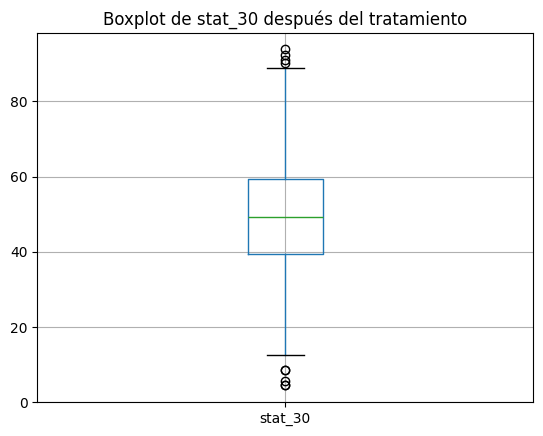

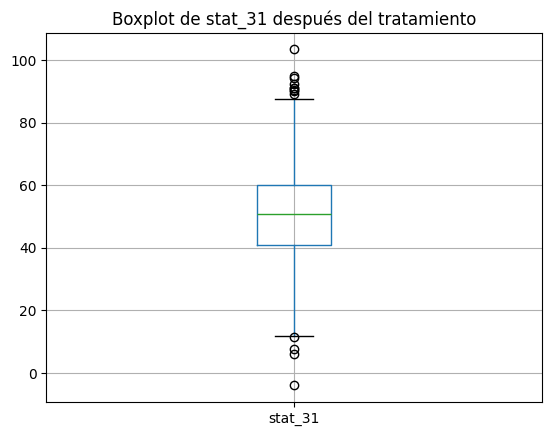

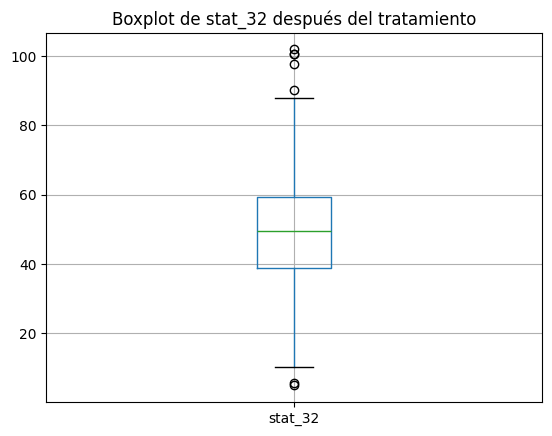

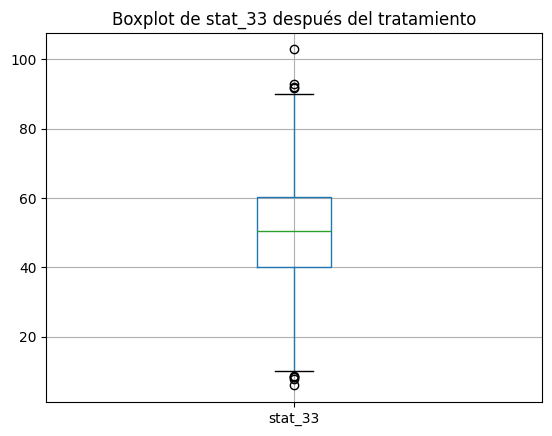

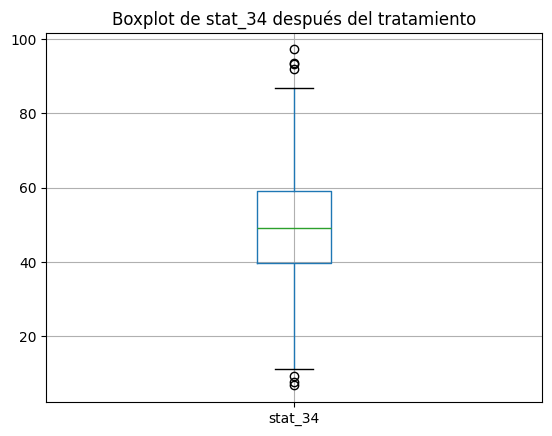

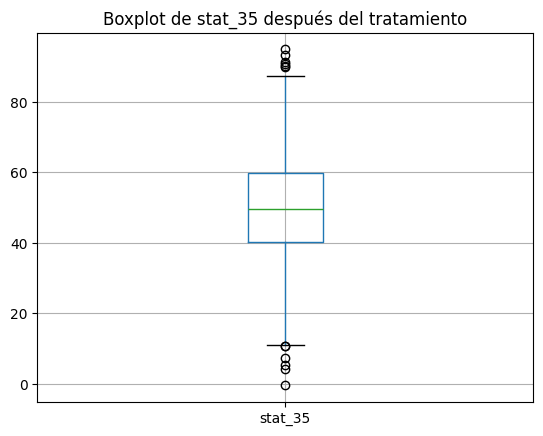

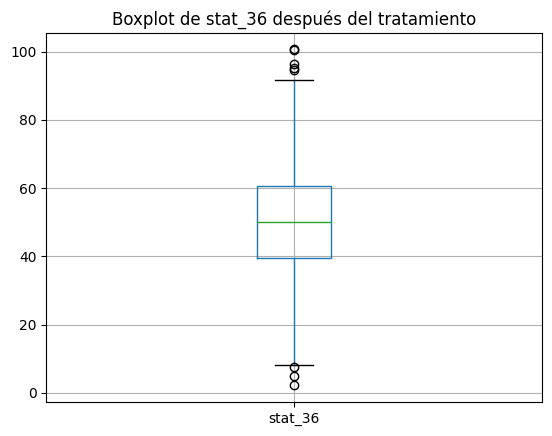

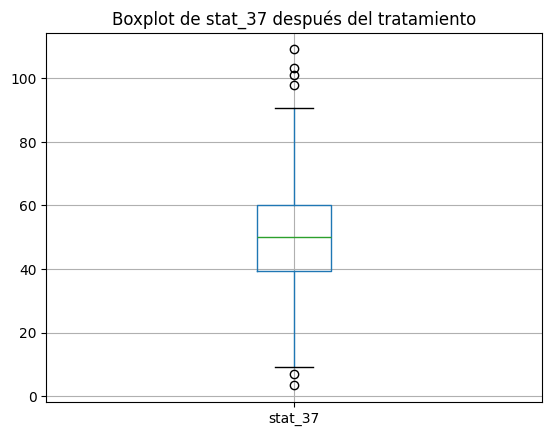

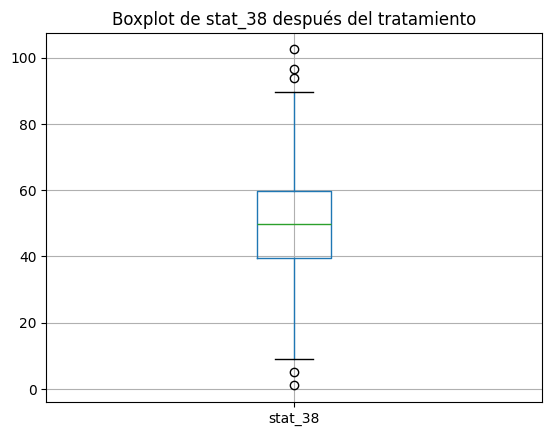

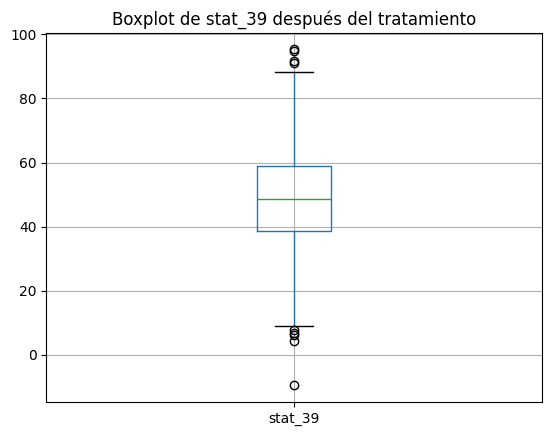

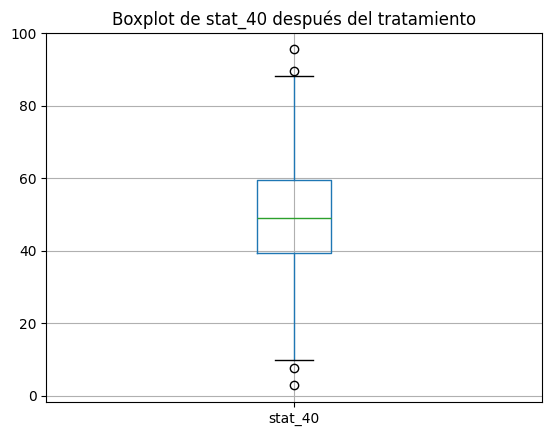

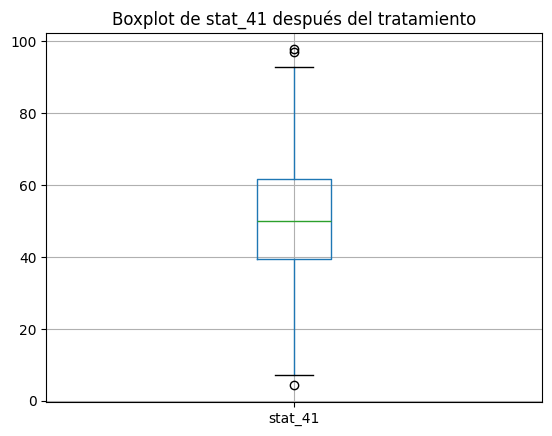

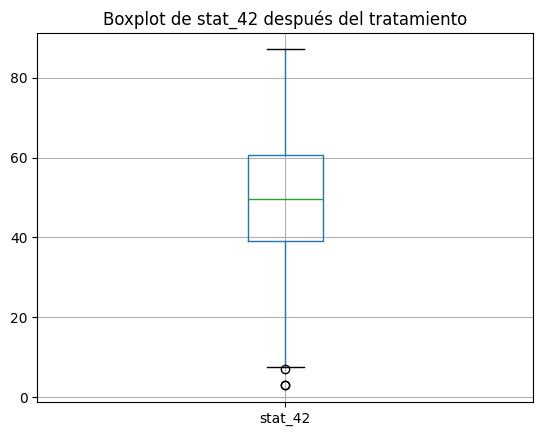

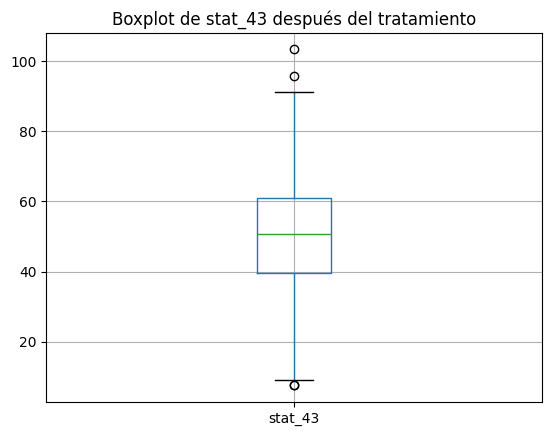

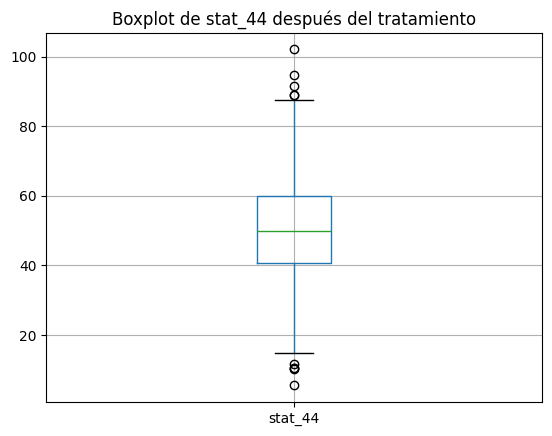

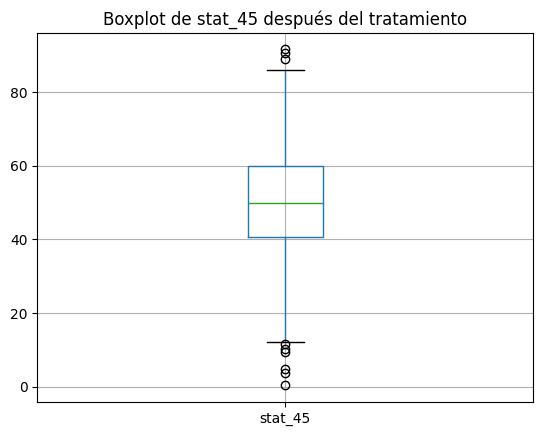

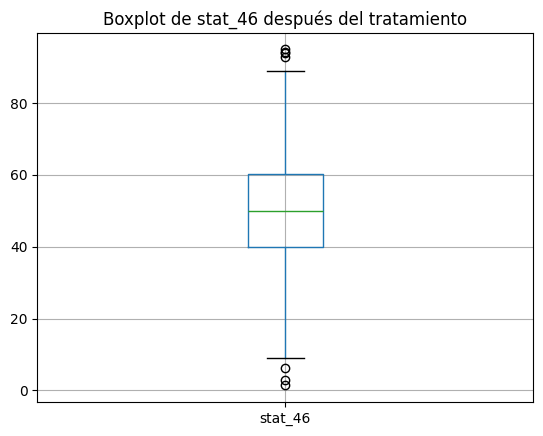

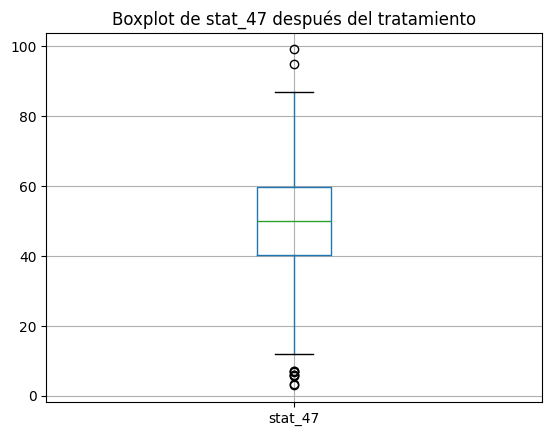

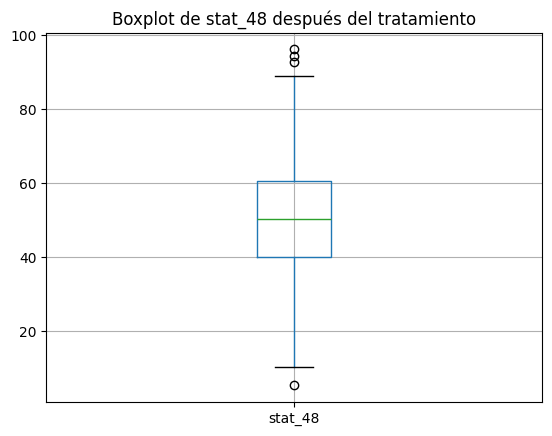

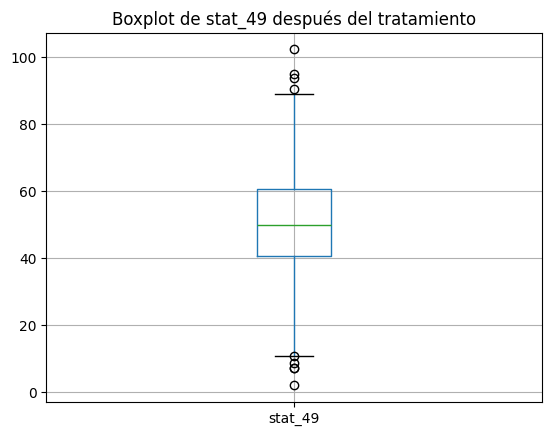

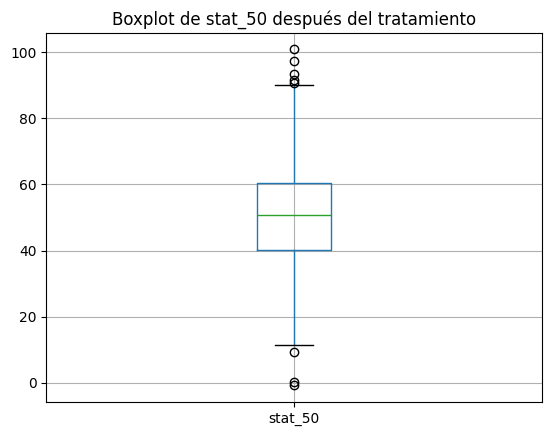

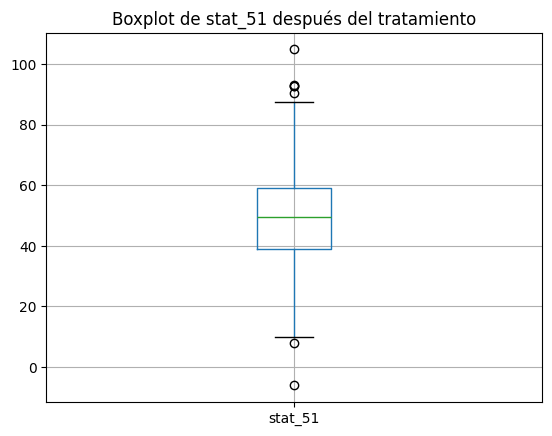

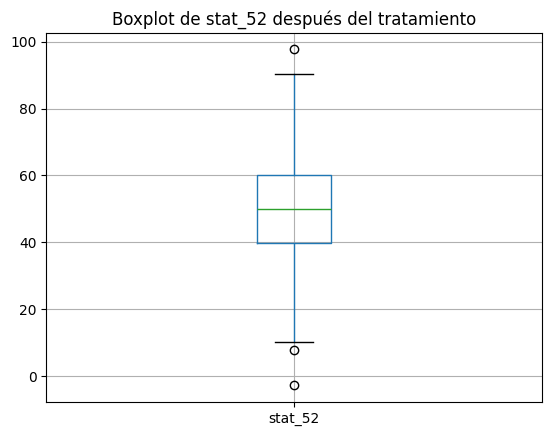

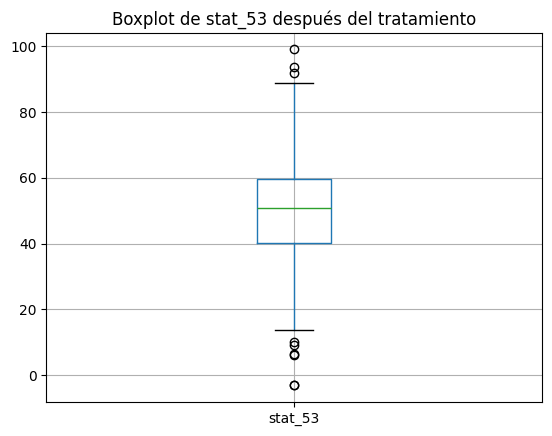

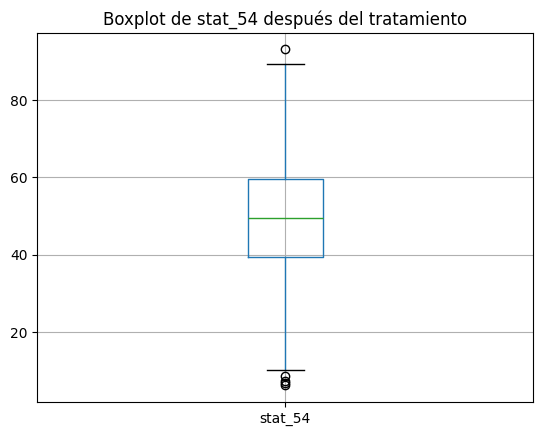

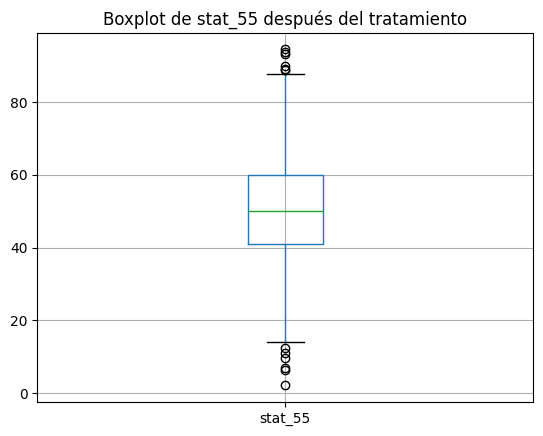

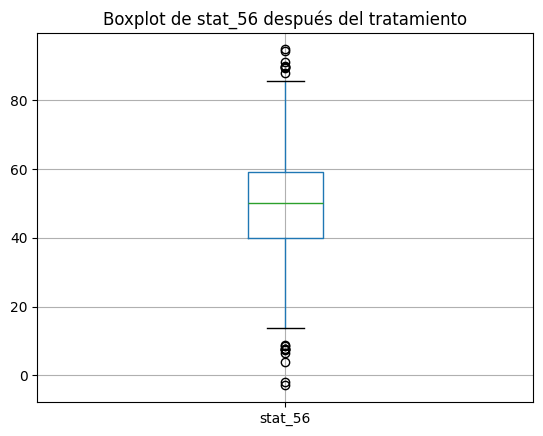

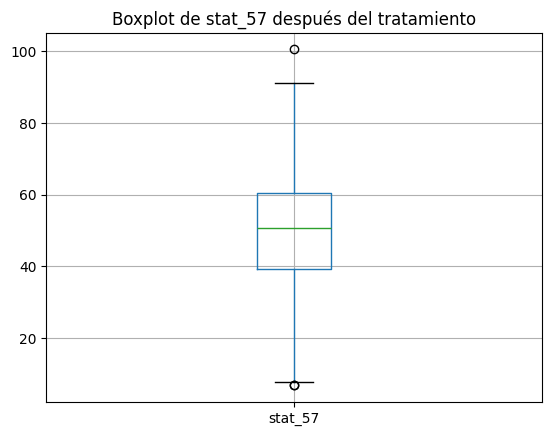

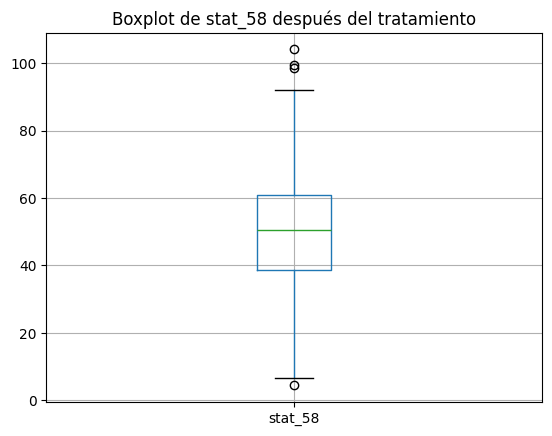

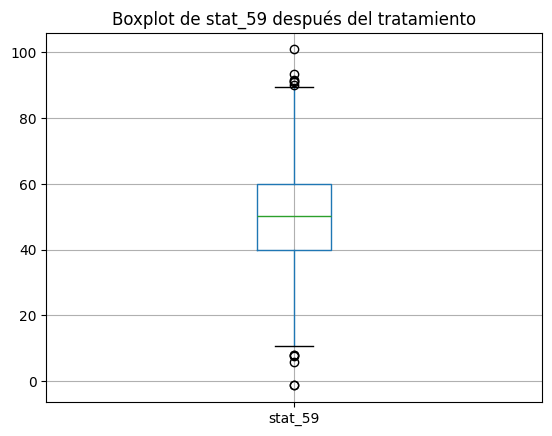

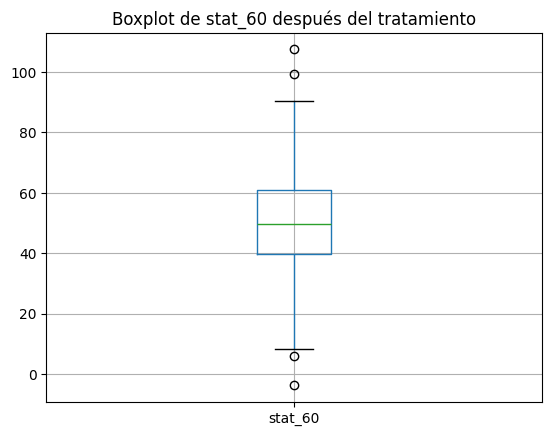

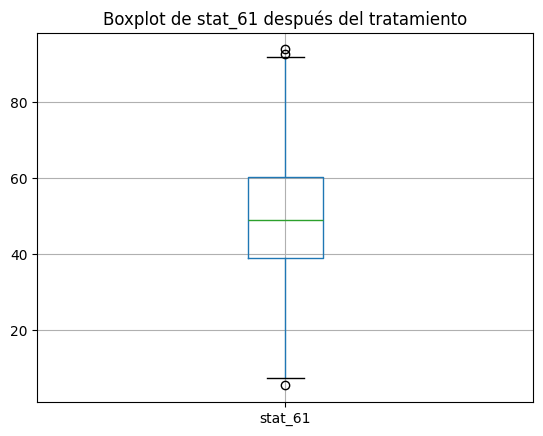

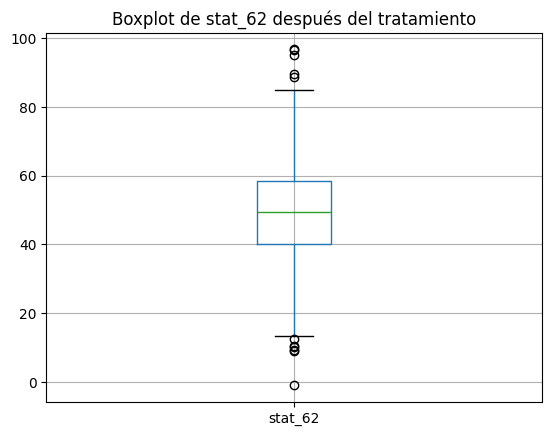

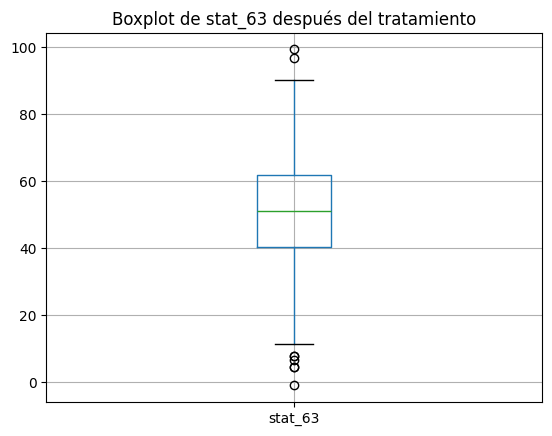

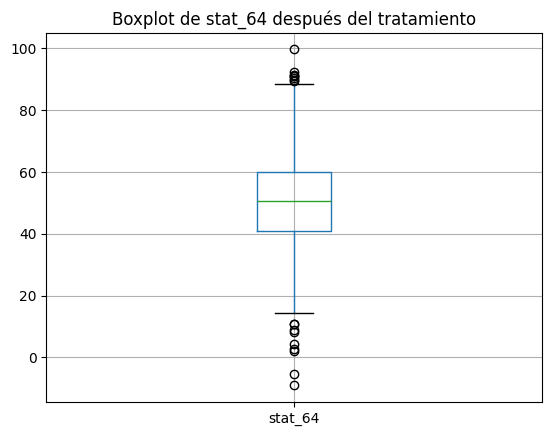

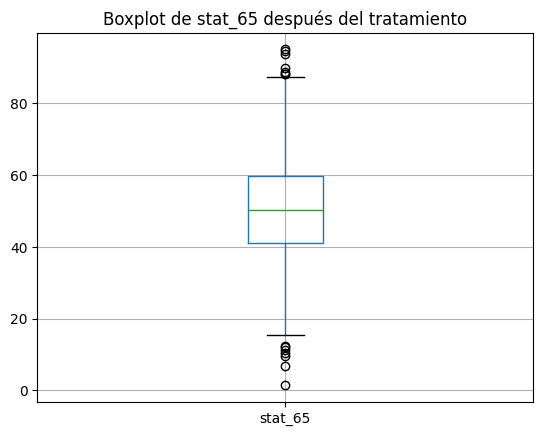

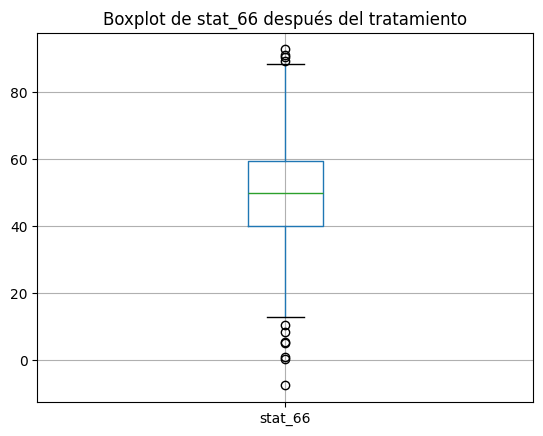

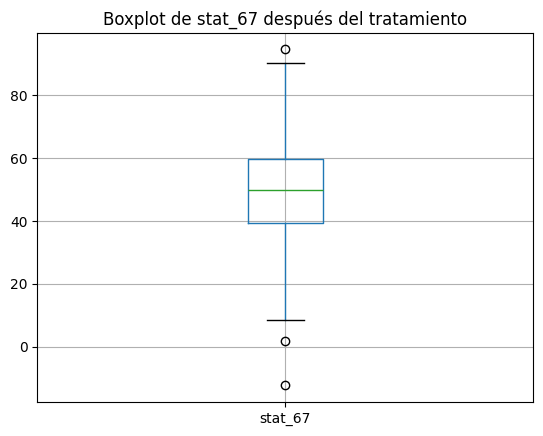

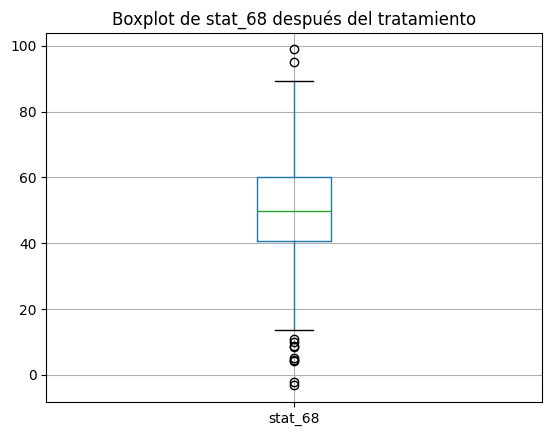

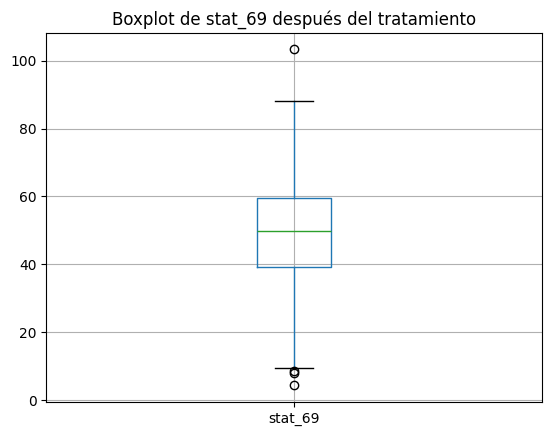

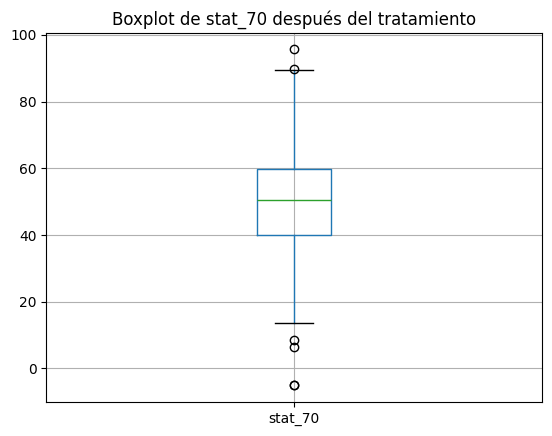

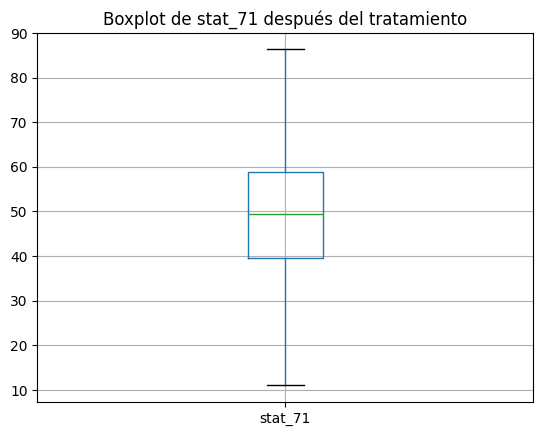

In [19]:
import matplotlib.pyplot as plt
print("Graficos boxplots antes del tratamiento")
numColsAntes = dfOriginal.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numColsAntes:
    plt.figure()
    dfOriginal.boxplot(column=col)
    plt.title(f'Boxplot de {col} antes del tratamiento')
    plt.show()

print("Graficos boxplots después del tratamiento")
numColsDespues = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numColsDespues:
    plt.figure()
    dfSinOutliers.boxplot(column=col)
    plt.title(f'Boxplot de {col} después del tratamiento')
    plt.show()

3. Ejercicio: crea una función `iqr_outliers(df, columna)` que devuelva límites
inferior y superior.